## Changes to the original steps:<br>
Changes to Notebook in Docoumnets/GitHub/RBR-Processing <br>
To call functions from the python file rather than have them embedded into the Notebook
* Check profiles plots and pressure difference FIRST<br>
* Call plotting and write file functions from outside this notebook<br>
* changed made to write file function so that they could be read in IOS Shell<br>
* change made to write file encoding="ascii"  otherwise files coulndn't be read by ios_shell shell_file package
* Clip doesn't match because it cuts too much off on python clip - or I didn't cut off enough in IOS shell.<br> 
* Rounded the Pressure for BINAVE to 0 decimal places, was getting 0.1 or 0.9, need whole numbers or 'bin value'
**------------------------------------------------------------------------------------------------------**

**RBR CTD DATA PROCESSING NOTES**<br>
Cruise: 2024-017<br>
Locations: Clayoquot Sound <br> 
Project: Clayoquot Weather Station Network - ACRDP  <br>
Party Chief: Cooper G.  <br>
Platform: Doug Anderson  <br>
Date: February 4, 2024 - February 7, 2024   <br>
  <br>
Processed by: Samantha Huntington <br>
Date of Processing: May 23, 2024 - May 23, 2024 <br>
Number of Raw files: 52          Number of Processed Files: 51 <br>

**Instrument Summary**<br>
Equipment: RBR Maestro CTD (s/n 232531) with a Turner Cyclops Fluorometer (s/n 2111617) and a JFE Advantech Rinko III oxygen sensor (s/n 0480).  <br> 
Sampling frequency was at 8Hz.  <br>
 
**Summary of Quality and Concerns**<br>
A cast list of times and locations was provided, “2024-017CTDTapLogFile_Final.csv”. The log file contained 56 casts, 5 of which were zooplankton <br>
nets, these five casts were removed when making the header merge file. <br>
The winch stopped working at 20m for cast 18, it was brought to the surface and restarted, creating an additional profile.<br>
<br>
The data overall look good with some spikes in Fluroescence.  There is a lot of noisy data at the surfce during the CTD soak. <br>


**Processing Summary**

*All processing code is available on request in RBR_Processing_Report_2024-017_suggested.ipynb.<br>* 

File **232531_20240206_1745.rsk** contained the 52 profiles. All profiles were extracted using python function READ_RSK().  <br> 
Profile numbers were matched to the event numbers provided in the log file. <br>
<br>
A dummy profile of 918 was assigned to the rsk profile for the first attempt at cast 18 using the header merge csv file.  <br>
The extracted csv file from this function ws then deleted before the next step. <br.
<br>

File **2024-017_header-merge.csv** was created, based on the information provided by the chief scientist.<br>
* Column “File_Name”: entries were derived from the event number.
* Column “LOC:LATITUDE”: latitude was provided and reformatted to “XX XX.XXXX N !(deg min)”.
* Column “LOC:LONGITUDE”: longitude was provided  and reformatted to “XX XX.XXXX W !(deg min)”.
* Column “LOC: Event Number”: entries were event numbers. 
* Column “LOC: STATION”: entries were taken from the Log file. <br>

A 6-line header was inserted using python function ADD_6LINEHDR_2().<br><br>
A Metadata Dictionary was created to hold information for the header files **2024-017_METADATA.csv**.  Python function CREATE_METADATA_DICT() was used to add addtional metadata to this csv file and it was saved as **2024-017_METADATA_filled.csv**.  Additional information is stored in the python function for later use in the creation of header files. <br><br>
The sampling site was mapped (Figure 1) using from **2024-017_header-merge.csv** using python function PLOT_TRACK_LOCATION() to check the location of all casts.<br>
The presence of zero-order holds were checked using Python function PLOT_PRESSURE_DIFF().  Zero-order holds were found (Figure 2.) and confirmed with python function CHECK_FOR_ZOH.py(). <br><br>
Profiles were checked using function CHECK_PROFILES().  A few Spikes were found in Fluorescence but were not related to gain changes and most were within reasonable limits. There was a significate spike in cast 52 and despiking was applied while corrections were made to the zero order holds and the spikes in corrections by re-running READ_RSK() and adding corrections rsk.correcthold() and rsk.despike(). from the pyRSKtools package.<br><br>
After the corrections were made, a new csv file was created **2024-017_CSV_DATA-6Linedr_corr_hold_spk.csv** and the corrected values were checked in python function Plot_Pressure_Diff().  Zero-order holds were found to be removed (Figure 3.).<br>
<br>
Cast variables were created from the output csv so they could be used in further processing using python function CREATE_CAST_VARIABLES().  A plotting templates were also created using functions FORMAT_PROCESSING_PLOT() and DO_TS_PLOT(). Pre-processing plots were examined with python function FIRST_PLOTS.py()<br>
<br>
Raw data were plotted and examined:<br>
* Salinity looks good with some noisy data during the soak for many casts.
* Temperature looks good with bad data the surface of many casts and the bottom of cast 43.
* Conductivity looks good with some noisy data during the soak for many casts.
* Oxygen looks good with some bad data at the surface of many casts.
* Fluorescence looks good with some spikes in the downcast of many casts. <br>

**Data processing**
* Correction to Pressure: there were no negative pressures found at the surface so pressure was not calibrated in in python funcion CALIB.py() .<br>
* All cast times matched the Log so there were no corrections made in CORRECT_TIME_OFFSET.py(). 
* CLIP: Pressure is steady for a variable number of scans. Records were removed from the beginning and end of the cast using CLIP_CAST.py().<br> 
* Profile plots were examined after CLIP. <br.
* Filter: a *moving average* filter, with a *window width of 6*, was applied using function FILTER.py() to temperature, conductivity, and pressure and fluorescenc. Salinity will be calculated in the next step. <br>
* SHIFT: Based on suggested values in document “Guidelines for processing RBR CTD profiles”, the alignment of temperature and conductivity was<br>
corrected by applying a shift of -2 scans in conductivity using SHIFT_CONDUCTIVITY.py(). <br> 
* SHIFT: Better alignment with Oxygen profiles was found by advancing it by 11 scans using SHIFT_OXYGEN. The advice given in document “Guidelines for processing <br>
RBR CTD Profiles” was that an advance between 2 and 3 seconds is appropriate. T-O plots before and after alignment were compared. <br>
* Convert Oxygen: Oxygen saturation was converted to Oxygen concentration in umol/kg and mL/L using python function DERIVE_OXYGEN_CONCENTRATION.py()<br>
* DELETE: Pressure reversals and swells were detected and delted using python function DELETE_PRESSURE_REVERSALS.py(). Plots were examined before <br> and after delete to confirm that reasonable values were shown. <br>
* Despiking: No date despiking took place on Fluorescence. <br>

**Final Checks and header editing**
* Time, Date, Cast_direction, and Event_number were removed from the channels using *2024-017_vars_to_drop.csv* and python function <br>
DROP_SELECT_VARS.py()<br>
* Python function BINAVE.py() was used to metre-average the data. <br>
* FINAL_EDIT.py() was used to calibrate conductivity unist to S/m, edit header information, and reorder the channels. 
* Processed data was examined after in had been plotted using function PLOT_PROCESSED.py(). 

**Write IOS Header Files**
* Python function WRITE_FILE.py() was used to write the final files in IOS Header format. <br>

**Set the parameters for this cruise**

In [15]:
year = "2024"
cruise_number = "017"
#dest_dir = f"C:\\Users\\huntingtons\\Desktop\\RBR_Processing\\CURRENT_PROCESSING\\{year}-{cruise_number}\\Suggested\\"
dest_dir = "C:\\Users\\huntingtons\\\Desktop\\RBR_Processing\\Github_June2024_test\\"
skipcasts = 0
rsk_start_end_times_file = None
rsk_time1, rsk_time2 = [None, None]
rsk_file = dest_dir + "232531_20240206_1745.rsk"  # "232531_20240223_1125.rsk"]
sample_rate = 8
left_lon, right_lon, bot_lat, top_lat = [None, None, None, None]
start_time_correction_file = None
verbose = True
shift_recs_conductivity: int = 2
shift_recs_oxygen = -11 
drop_vars_file = "2024_017_vars_to_drop.csv"
processing_report_name = f"{year}-{cruise_number}_RBR_Processing_Report.docx"
# 5 lines of processing comments are added here and included in the write_comments function.  If more lines are needed, adjust the function. 
processing_comments1 = "       " + "Cast 18 stopped at 20m and was brought to the surface and re-started." 
processing_comments2 = None # format is "       " + "Your text here"
processing_comments3 = None
processing_comments4 = None
processing_comments5 = None

In [6]:
#import cartopy.crs as ccrs
#from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter, LatitudeLocator
import sys
import os
import pyrsktools
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
from copy import deepcopy  # copy,
from scipy import signal
import gsw
from matplotlib import pyplot as plt
from datetime import datetime
import random
from o2conversion import O2stoO2c
from seawater import eos80
import shutil
import pandoc

In [7]:
# Set Global variables
VARIABLES_POSSIBLE = [
    "Salinity",
    "Temperature",
    "Conductivity",
    "Oxygen",
    "Fluorescence",
    "Oxygen_mL_L",
    "Oxygen_umol_kg",
]
VARIABLE_UNITS = ["PSS-78", "C", "mS/cm", "%", "ug/L", "mL/L", "umol/kg"]
VARIABLE_COLOURS = ["b", "r", "goldenrod", "grey", "g", "grey", "grey"]

**Read the rsk file**<br>
Inputs<br>
*dest_dir<br>
*year<br>
*cruise_number<br>
*skipcasts<br>
*rsk_time1, rsk_time2<br>
*zoh, fix_spk<br>
<br>
This function reads in the rsk file and takes the cast numbers from the header merge csv file and outputs a <br<
csv file for each profile. <br>
In this first instance no corrections will be made to the rsk data.

In [16]:
from RBR_CTD_IOS_2024 import READ_RSK
READ_RSK(dest_dir=dest_dir, year=year, cruise_number=cruise_number, skipcasts=skipcasts, zoh=False, fix_spk=False, rsk_start_end_times_file=None, rsk_time1=None, rsk_time2=None)

232531_20240206_1745.rsk
no corrections being made
Using original values


'_CTD_DATA-6linehdr.csv'

**Merge the files**<br>
<br>
Merge all the profile csv files into one data file

In [17]:
from RBR_CTD_IOS_2024 import MERGE_FILES
MERGE_FILES(dest_dir=dest_dir, year=year, cruise_number=cruise_number)

**Create Metadata Dictionary** <br>
Read in a csv file and then populate it with more information from the rsk file. <br>
This function outputs a new csv file while also creating a dictionary for use in functions further in the process.

In [19]:
from RBR_CTD_IOS_2024 import CREATE_META_DICT
CREATE_META_DICT(dest_dir, rsk_file, year, cruise_number, rsk_time1, rsk_time2)

{'Processing_Start_time': datetime.datetime(2024, 6, 27, 16, 8, 45, 404924),
 'Instrument_information': Instrument(instrumentID=1, serialID=232531, model='RBRmaestro³', firmwareVersion='1.149', firmwareType=104, partNumber='L3-M11-F13-SEC11-BEC12-INT11-G2-SCT12-SP11-SDOX113-SFL13-STU12'),
 'Sampling_Interval': '0.125',
 'RSK_filename': array(['232531_20240206_1745.rsk'], dtype=object),
 'Channels': ['conductivity',
  'temperature',
  'pressure',
  'chlorophyll_a',
  'temperature1',
  'dissolved_o2_saturation',
  'turbidity',
  'sea_pressure',
  'salinity',
  'depth'],
 'Channel_details': [Channel(channelID=1, shortName='cond19', longName='conductivity', unitsPlainText='mS/cm', isMeasured=1, isDerived=0, units='mS/cm', label='conductivity_00', feModuleType='FE-cond3-cond', feModuleVersion=6.041, _dbName='Conductivity'),
  Channel(channelID=2, shortName='temp14', longName='temperature', unitsPlainText='Degrees_C', isMeasured=1, isDerived=0, units='°C', label='temperature_00', feModuleTyp

**ADD 6LINEHEADER**
Create a 6 line header csv file that can be used in IOS Shell if need be, to be archived with the <br>
output files.

In [ ]:
from RBR_CTD_IOS_2024 import ADD_6LINEHEADER_2
ADD_6LINEHEADER_2

In [23]:
def ADD_6LINEHEADER(output_ext):
    # Add six-line header to the .csv file.
    # This file could be used for data processing via IOSShell
    input_name = str(year) + "-" + str(cruise_number) + "_CTD_DATA.csv"
    output_name = str(year) + "-" + str(cruise_number) + output_ext
    input_filename = os.path.join(dest_dir, input_name)
    ctd_data = pd.read_csv(input_filename, header=0)
    
    ctd_data["Time(yyyy-mm-dd HH:MM:ss.FFF)"] = ctd_data[
            "Time(yyyy-mm-dd HH:MM:ss.FFF)"
        ].str[:19]
    ctd_data["Date"] = pd.to_datetime(
        ctd_data["Time(yyyy-mm-dd HH:MM:ss.FFF)"])  # add new column of Date
    ctd_data["Date"] = [d.date() for d in ctd_data["Date"]]
    ctd_data["TIME:UTC"] = pd.to_datetime(ctd_data["Time(yyyy-mm-dd HH:MM:ss.FFF)"])  # add new column of time
    ctd_data["TIME:UTC"] = [d.time() for d in ctd_data["TIME:UTC"]]
    ctd_data["Date"] = pd.to_datetime(ctd_data["Date"], format="%Y-%m-%d").dt.strftime(
            "%d/%m/%Y")
    
    # Rules to replace list of columns to drop; may not be full-proof
    is_temperature_secondary = (
        lambda name: "temperature" in name.lower() and "1" in name
    )
    is_speedofsound = lambda name: "speed" in name.lower() and "sound" in name.lower()
    is_specificconductivity = (
        lambda name: "specific" in name.lower() and "conductivity" in name.lower()
    )
    is_densityanomaly = (
        lambda name: "density" in name.lower() and "anomaly" in name.lower()
    )
    is_dissolvedO2concentration = (
        lambda name: "dissolved" in name.lower()
                    and "O" in name
                        and "concentration" in name.lower()
    )
    is_turbidity = lambda name: "turbidity" in name.lower()
    
    drop_list = ["Time(yyyy-mm-dd HH:MM:ss.FFF)", "Unnamed: 0"]
    for col in ctd_data.columns:
        if any(
                [
                    is_temperature_secondary(col),
                    is_speedofsound(col),
                    is_specificconductivity(col),
                    is_densityanomaly(col),
                    is_dissolvedO2concentration(col),
                    is_turbidity(col),
                ]
        ):
            drop_list.append(col)
    
    # Drop first indexing row and Time(HH....) plus everything else in drop_list if present
    # Ignore KeyError if columns in drop_list do not exist in the dataframe
    ctd_data.drop(columns=drop_list, inplace=True, errors="ignore")
    # ctd_data.reset_index(drop=True, inplace=True)
    
    col_list = ctd_data.columns.tolist()
    #print(col_list)
    
    # set empty column names
    column_names = {
        old: new for old, new in zip(col_list, np.arange(len(ctd_data.columns)))
    }
    ctd_data.rename(columns=column_names, inplace=True)  # remove column names
    
    # append header information into the empty lists
    channel_list = ["Y", "Y", "N", "Y", "Y", "Y", "Y", "Y", "N", "Y", "Y", "Y"]
    index_list = [
        "Conductivity",
        "Temperature",
        "Pressure_Air",
        "Fluorescence",
        "Oxygen:Dissolved:Saturation",
        "Pressure",
        "Depth",
        "Salinity:CTD",
        "Cast_direction",
        "Event_number",
        "Date",
        "TIME:UTC",
    ]
    unit_list = [
            "mS/cm",
            "deg C(ITS90)",
            "decibar",
            "mg/m^3",
            "%",
            "decibar",
            "meters",
            "PSS-78",
            "n/a",
            "n/a",
            "n/a",
            "n/a",
    ]
    input_format_list = [
        "R4",
        "R4",
        "R4",
        "R4",
        "R4",
        "R4",
        "R4",
        "R4",
        " ",
        "I4",
        "D:dd/mm/YYYY",
        "T:HH:MM:SS",
    ]
    output_format_list = [
        "R4:F11.4",
        "R4:F9.4",
        "R4:F7.1",
        "R4:F8.3",
        "R4:F11.4",
        "R4:F7.1",
        "R4:F7.1",
        "R4:F9.4",
        " ",
        "I:I4",
        "D:YYYY/mm/dd",
        "T:HH:MM:SS",
    ]
    na_value_list = [
        "-99",
        "-99",
        "-99",
        "-99",
        "-99",
        "-99",
        "-99",
        "-99",
        "",
        "-99",
        "",
        "",
    ]
    
    is_conductivity = lambda name: "conductivity" in name.lower()
    is_temperature_primary = lambda name: "temperature" in name.lower()
    is_pressure = lambda name: "pressure" in name.lower() and "sea" not in name.lower()
    is_chlorophyll = lambda name: "chlorophyll" in name.lower()
    is_O2saturation = (
        lambda name: "saturation" in name.lower()
                        and "o" in name.replace("saturation", "").lower()
    )
    is_seapressure = lambda name: "pressure" in name.lower() and "sea" in name.lower()
    is_depth = lambda name: "depth" in name.lower()
    is_salinity = lambda name: "salinity" in name.lower()
    is_castdirection = lambda name: name == "Cast_direction"
    is_event = lambda name: name == "Event"
    is_date = lambda name: name == "Date"
    is_time = lambda name: name == "TIME:UTC"
    
    is_channel_functions = [
        is_conductivity,
        is_temperature_primary,
        is_pressure,
        is_chlorophyll,
        is_O2saturation,
        is_seapressure,
        is_depth,
        is_salinity,
        is_castdirection,
        is_event,
        is_date,
        is_time,
    ]
    
    # Create empty lists to add information of available channels to
    channel = []
    index = []
    unit = []
    input_format = []
    output_format = []
    na_value = []
    
    for col in col_list:
        for i in range(len(channel_list)):
            if is_channel_functions[i](col):
                channel.append(channel_list[i]), index.append(
                    index_list[i]
                ), unit.append(unit_list[i]), input_format.append(
                    input_format_list[i]
                ), output_format.append(
                    output_format_list[i]
                ), na_value.append(
                    na_value_list[i]
                )
    
    header = pd.DataFrame([channel, index, unit, input_format, output_format, na_value])
       
        # If plan shapes not aligned error, then may need to add another variable to channel_spellings
    try:
        ctd_data_header = pd.concat((header, ctd_data))
        ctd_data_header.to_csv(dest_dir + output_name, index=False, header=False)
        # Do a check to make sure the right columns were captured or discarded
        if np.nan in ctd_data_header.columns:
            print("Warning: Not all the right columns have been captured or discarded")
            print("Output csv file data column names:", ctd_data_header.columns)
    except ValueError as e:
        print(
            "If plan shapes are not aligned, then may need to add new channel name "
            "spellings to channel_spellings list"
        )
        print(e.args)

ADD_6LINEHEADER(output_ext="_CTD_DATA-6linehdr.csv")

**PLOT TRACK LOCATION**

sampling area


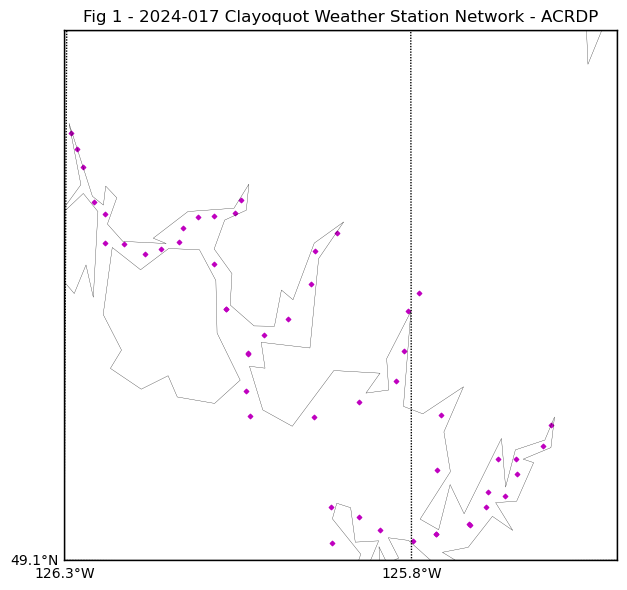

In [24]:
# Create a folder for figures if it doesn't already exist
figure_dir = os.path.join(dest_dir, "FIG")
if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)

input_name = str(year) + "-" + str(cruise_number) + "_header-merge.csv"
input_filename = dest_dir + input_name
header = pd.read_csv(input_filename, header=0)
header["lat_degree"] = header["LOC:LATITUDE"].str[:2].astype(int)
header["lat_min"] = header["LOC:LATITUDE"].str[3:10].astype(float)
header["lat"] = header["lat_degree"] + header["lat_min"] / 60
header["lon_degree"] = header["LOC:LONGITUDE"].str[:3].astype(int)
header["lon_min"] = header["LOC:LONGITUDE"].str[4:12].astype(float)
header["lon"] = 0 - (header["lon_degree"] + header["lon_min"] / 60)
# event = header['LOC:STATION'].astype(str)
project_name = header["ADM:Project"][0]

lon = header["lon"].tolist()
lat = header["lat"].tolist()
# event = event.tolist()

# If map extent limits are not provided, then make some up based on the data
coord_limits = [
    np.floor(np.min(header["lon"]) * 10) / 10,
    np.ceil(np.max(header["lon"]) * 10) / 10,
    np.floor(np.min(header["lat"]) * 10) / 10,
    np.ceil(np.max(header["lat"]) * 10) / 10,
]

left_lon = coord_limits[0] if left_lon is None else left_lon
right_lon = coord_limits[1] if right_lon is None else right_lon
bot_lat = coord_limits[2] if bot_lat is None else bot_lat
top_lat = coord_limits[3] if top_lat is None else top_lat

m = Basemap(
    llcrnrlon=left_lon,
    llcrnrlat=bot_lat,
    urcrnrlon=right_lon,
    urcrnrlat=top_lat,
    projection="lcc",
    resolution="i",
    lat_0=0.5 * (bot_lat + top_lat),
    lon_0=0.5 * (left_lon + right_lon),
)  # lat_0=53.4, lon_0=-129.0)

x, y = m(lon, lat)

fig = plt.figure(num=None, figsize=(8, 6), dpi=100)
m.drawcoastlines(linewidth=0.2)
m.drawmapboundary(fill_color="white")
# m.fillcontinents(color='0.8')
m.drawrivers()

m.scatter(x, y, marker="D", color="m", s=5)
# m.plot(x, y, marker='D', color='m', markersize=4)
#   for event, xpt, ypt in zip(event, x, y):
#       plt.text(xpt, ypt, event)

parallels = np.arange(bot_lat, top_lat, 0.5)
m.drawparallels(
    parallels, labels=[True, False, True, False]
)  # draw parallel lat lines
meridians = np.arange(left_lon, right_lon, 0.5)
m.drawmeridians(meridians, labels=[False, False, False, True])
plt.title("Fig 1 - " + year + "-" + cruise_number + " " + project_name)
plt.tight_layout()
plt.savefig(
    os.path.join(figure_dir, f"{year}-{cruise_number}_basemap_sampling_area.png")
)  # 'Fig_1.png'
print('sampling area')
plt.show()
plt.close(fig)

**Plot Pressure Difference**

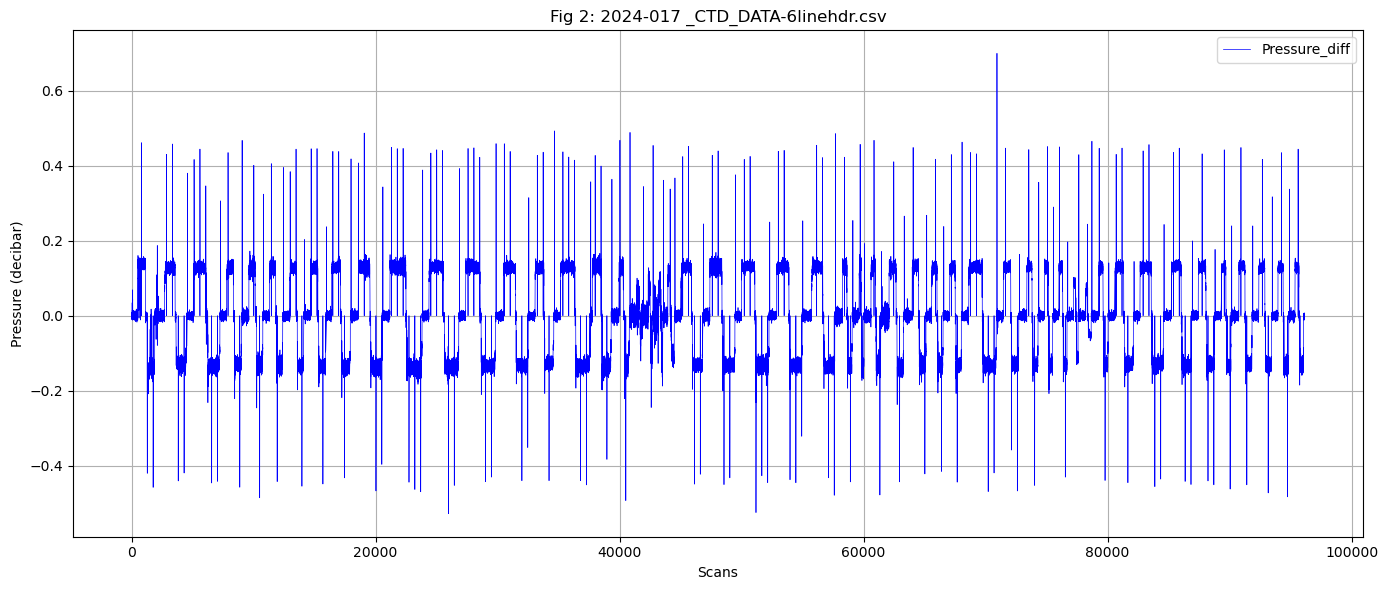

In [25]:
def PLOT_PRESSURE_DIFF(dest_dir: str, year: str, cruise_number: str, input_ext: str):
    # Create a folder for figures if it doesn't already exist
    figure_dir = os.path.join(dest_dir, "FIG")
    if not os.path.exists(figure_dir):
        os.makedirs(figure_dir)

    # input_name will depend on the need for zero order holds
    input_name = str(year) + "-" + str(cruise_number) + input_ext
    input_filename = dest_dir + input_name
    ctd_data = pd.read_csv(input_filename, header=None, low_memory=False)
    ctd_data = ctd_data.rename(
        columns=ctd_data.iloc[1]
    )  # assign the second row as column names
    ctd_data = ctd_data.rename(
        columns={
            "Oxygen:Dissolved:Saturation": "Oxygen",
            "Salinity:CTD": "Salinity",
            "TIME:UTC": "TIME",
        }
    )
    ctd = ctd_data.iloc[6:]
    ctd.index = np.arange(0, len(ctd))
    # ctd = ctd[1000:4000] # to limit the number of records plotted -

    pressure = ctd["Pressure"].apply(pd.to_numeric)
    pressure_lag = pressure[1:]
    pressure_lag.index = np.arange(0, len(pressure_lag))
    pressure_diff = pressure_lag - pressure

    fig = plt.figure(num=None, figsize=(14, 6), dpi=100)
    plt.plot(pressure_diff, color="blue", linewidth=0.5, label="Pressure_diff")
    plt.ylabel("Pressure (decibar)")
    plt.xlabel("Scans")
    plt.grid()
    plt.legend()
    plt.title("Fig 2: " + year + "-" + cruise_number + " " + input_ext)
    plt.tight_layout()
    plt.savefig(os.path.join(figure_dir, "zero_order_holds_" + input_ext + ".png"))
    plt.show()
    plt.close(fig)
    return

PLOT_PRESSURE_DIFF(dest_dir, year, cruise_number, input_ext = '_CTD_DATA-6linehdr.csv')
    

**Check for Zero order hold**

In [26]:
def check_for_zoh(
        dest_dir, year: str, cruise_number: str, sampling_interval: float
) -> bool:

    input_name = str(year) + "-" + str(cruise_number) + "_CTD_DATA-6linehdr.csv"
    input_filename = dest_dir + input_name
    ctd_data = pd.read_csv(input_filename, header=None, low_memory=False)
    # assign the second row as column names
    ctd_data = ctd_data.rename(columns=ctd_data.iloc[1])
    ctd_data = ctd_data.rename(
        columns={
            "Oxygen:Dissolved:Saturation": "Oxygen",
            "Salinity:CTD": "Salinity",
            "TIME:UTC": "TIME",
        }
    )
    ctd = ctd_data.iloc[6:]
    ctd.index = np.arange(0, len(ctd))

    pressure = ctd["Pressure"].apply(pd.to_numeric)
    pressure_diffs = np.diff(pressure)

    sec2min = 1 / 60  # Convert seconds to minutes b/c sampling interval in seconds
    if sum(pressure_diffs == 0) >= np.floor(
            len(pressure) * sampling_interval * sec2min
    ):
        zoh_correction_needed = True
    else:
        zoh_correction_needed = False
    return zoh_correction_needed

zoh = check_for_zoh(
        dest_dir, year, cruise_number, float(meta_dict["Sampling_Interval"]))
print(zoh)

True


In [11]:
# if you need to check the channels
# rsk.printchannels()

**Check Profile Plots**
Look for any obvious spikes

In [ ]:
def check_profiles(name1, name2):
    files = os.listdir(dest_dir)  # list all the files in dest_dir
    files = list(filter(lambda f: f.endswith(".rsk"), files))  # keep the rsk files only
    n_files = len(files)  # get the number of files

     # current_profile = event_start
    header_merge_file = os.path.join(dest_dir, f"{year}-{cruise_number}_header-merge.csv")
    header_merge_df = pd.read_csv(header_merge_file)
    # Get event numbers from the header-merge.csv file
    header_event_no = header_merge_df.loc[:, "LOC:Event Number"].to_numpy()
    # initialize counter to go through the event numbers in header_merge_df
    event_number_idx = 0 


    for k in range(n_files):
        print(files[k])
         # Open the rsk file and read the data within it
        filename = os.path.join(
                str(dest_dir), str(files[k])
            )  # full path and name of .rsk file
        # readHiddenChannels=True does not reveal the derived variables
        rsk = pyrsktools.RSK(filename, readHiddenChannels=False)  # load up an RSK
        rsk.open()
        rsk.readdata()

 

        # Compute the derived channels so as to make number of channels accurate
        rsk.derivesalinity()
        rsk.deriveseapressure()
        rsk.derivedepth()
    
        downcastIndices = rsk.getprofilesindices(direction="down")
        for i in range(0,len(downcastIndices)):
        # for i in range(skipcasts[k],len(downcastIndices)):
            fig, axes = rsk.plotprofiles(
                channels=["conductivity", "temperature", "chlorophyll_a", "salinity", 'dissolved_o2_saturation'],
                profiles=i,
                direction="down",
                )
            plot_name = f"{name1}Plot_cast_{str(header_event_no[event_number_idx])}_rsk.png"
            plt.savefig(os.path.join(dest_dir + "FIG\\" + plot_name))   
            plt.show()
            plt.close() 
            event_number_idx  +=1
            
   
check_profiles(name1="Pre_Processing_", name2="Pre_Processing_")


**Make first corrections** <br>
* Correct the hold using rsk.correcthold(), this will correct holds in all channels.<br>
* CSV files will be re-generated and replaced and merged. 
* Despike Fluorescence and any other channels if needed.  The default is 2 standard deviations in a window of 11. Add channels if needed. <br>


In [28]:
# confirm despiking
spk_input = input('Is despiking needed? True or False')
if spk_input == 'True':
    spk_input = True
elif spk_input == 'False':
    spk_input = False
else:
    print('spike input is incorrect')

zoh_input = input('Is zoh correction needed? True or False')

if zoh_input == 'True':
    zoh_input = True
elif zoh_input == 'False':
    zoh_input = False
else:
    print('zoh input is incorrect')

fix_spk = spk_input
zoh = zoh_input 

fill_action = "interp"
fill_type = "interpolated value"
spk_window = 11
spk_std = 3
spk_var = "Fluorescence:URU"

# get the new input extension
input_ext = READ_RSK(dest_dir, year, cruise_number, skipcasts, rsk_start_end_times_file, rsk_time1, rsk_time2, zoh=zoh,fix_spk=fix_spk)

Is despiking needed? True or False True
Is zoh correction needed? True or False True


232531_20240206_1745.rsk
52


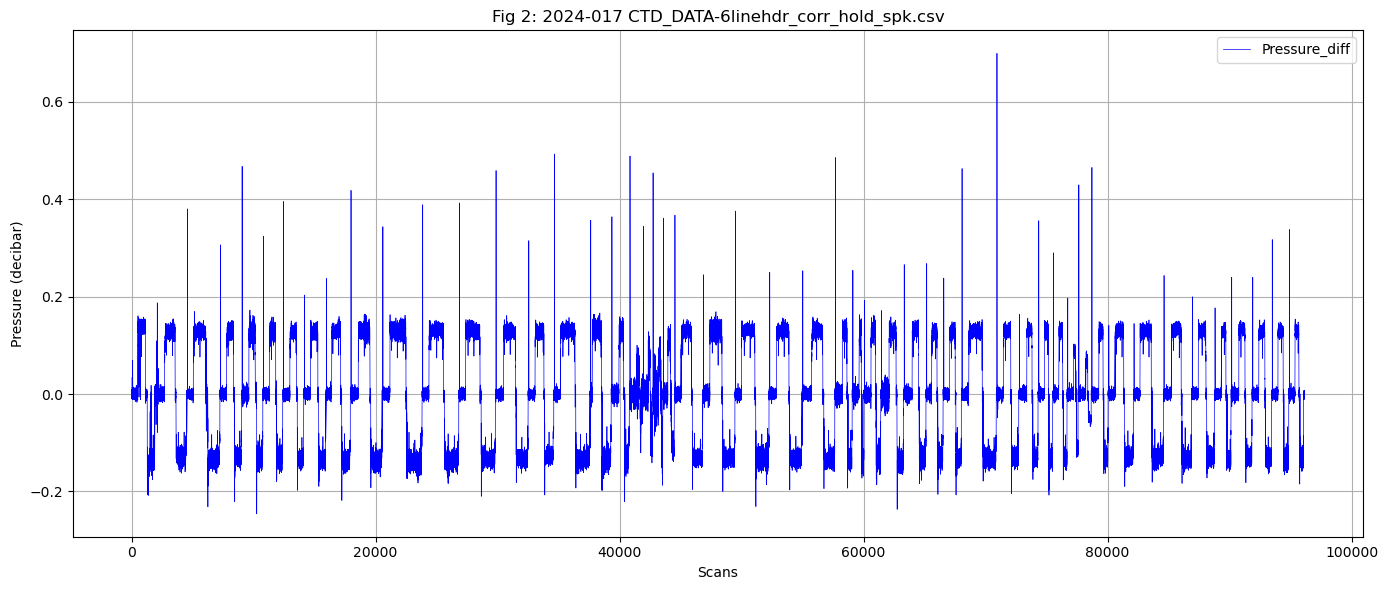

Using despiked and zero-order holds corrected variables


In [29]:
    
if zoh:

    MERGE_FILES()
    ADD_6LINEHEADER(output_ext = input_ext)
    PLOT_PRESSURE_DIFF(dest_dir, year, cruise_number, input_ext)

    if verbose:
        if fix_spk==True:
            print("Using despiked and zero-order holds corrected variables")
        elif fix_spk==False:
            print("Using zero-order holds corrected variables")


else:
    if fix_spike==True:
        MERGE_FILES()
        ADD_6LINEHEADER(output_ext = input_ext)
        PLOT_PRESSURE_DIFF(dest_dir, year, cruise_number, input_ext)
        print('using despiked fluorescence')
    elif fix_spike==False:
        
            print("using original variables")
       

**Create Cast Variables and Format processing Plots**
* Set input_extension needed depending on a zero-order-holds correction
* format processing plots

In [30]:
def CREATE_CAST_VARIABLES(
        year: str, cruise_number: str, dest_dir: str, input_ext: str
) -> tuple:
    """
    Read in a csv file and output data dictionaries to hold profile data
    Inputs:
        - dest_dir
        - year
        - cruise_number
        - input_ext: '_CTD_DATA-6linehdr.csv' or '_CTD_DATA-6linehdr_corr_hold.csv', or hold & spike
    Outputs:
        - three dictionaries containing casts, downcasts and upcasts
    """
    input_name = str(year) + "-" + str(cruise_number) + input_ext
    print(input_name)
    input_filename = dest_dir + input_name
    ctd_data = pd.read_csv(
        input_filename, header=None, low_memory=False
    )  # read data without header
    ctd_data = ctd_data.rename(
        columns=ctd_data.iloc[1]
    )  # assign the second row as column names
    ctd_data = ctd_data.rename(
        columns={
            "Oxygen:Dissolved:Saturation": "Oxygen",
            "Salinity:CTD": "Salinity",
            "TIME:UTC": "TIME",
        }
    )
    ctd = ctd_data.iloc[6:]
    # drop NaNs from Zero order holds correction
    # (not including O or F in case they aren't present - but will capture)
    if input_ext == "_CTD_DATA-6linehdr.csv":
        pass  # ctd = ctd
    elif input_ext == "_CTD_DATA-6linehdr_corr_hold.csv":
        ctd = ctd.dropna(
            axis=0,
            subset=[
                "Conductivity",
                "Temperature",
                "Pressure_Air",
                "Pressure",
                "Depth",
                "Salinity",
            ],
            how="all",
        )  # I don't think this does anything - NaNs now dropped in Correct_Hold stage # this was changed
           # fill with an interpolated value instead of NaN
    ctd = ctd.copy()
    cols = ctd.columns[0:-4]
    # cols_names = ctd.columns.tolist()
    ctd[cols] = ctd[cols].apply(pd.to_numeric, errors="coerce", axis=1)
    ctd["Cast_direction"] = ctd["Cast_direction"].str.strip()

    # Fix the iteration to account for event numbers that aren't sequential or start at n>1
    unique_event_numbers = ctd["Event_number"].unique()

    var_holder = {}
    for i in unique_event_numbers:
        # Assign values of type DataFrame
        var_holder["cast" + str(i)] = ctd.loc[(ctd["Event_number"] == str(i))]
    # var_holder['Processing_history'] = ""

    # Downcast dictionary
    var_holder_d = {}
    # for i in range(1, n + 1):
    for i in unique_event_numbers:
        var_holder_d["cast" + str(i)] = ctd.loc[
            (ctd["Event_number"] == str(i)) & (ctd["Cast_direction"] == "d")
        ]
    # var_holder_d['Processing_history'] = ""

    # Upcast dictionary
    var_holder_u = {}
    # for i in range(1, n + 1, 1):
    for i in unique_event_numbers:
        var_holder_u["cast" + str(i)] = ctd.loc[
            (ctd["Event_number"] == str(i)) & (ctd["Cast_direction"] == "u")
        ]
    # var_holder_u['Processing_history'] = ""

    return var_holder, var_holder_d, var_holder_u

cast, cast_d, cast_u = CREATE_CAST_VARIABLES(
        year, cruise_number, dest_dir, input_ext
    )
for cast_i in cast_d.keys():
    have_oxy = True if "Oxygen" in cast_d[cast_i].columns else False
    have_fluor = True if "Fluorescence" in cast_d[cast_i].columns else False
    
    #if verbose:
        
    print(f"have_oxy: {have_oxy}, have_fluor: {have_fluor}")
    break


2024-017CTD_DATA-6linehdr_corr_hold_spk.csv
have_oxy: True, have_fluor: True


**Call the plotting functions**

In [32]:
from RBR_plots import format_processing_plot, do_ts_plot

**Pre-Processing Plots**

In [33]:
def first_plots(year: str, cruise_number: str, dest_dir: str, input_ext: str) -> None:
   

    # Create a folder for figures if it doesn't already exist
    figure_dir = os.path.join(dest_dir, "FIG")
    if not os.path.exists(figure_dir):
        os.makedirs(figure_dir)

    # Input ext specifies whether to use 6lineheader file with or without
    # the zero-order hold removed
  #  cast, cast_d, cast_u = CREATE_CAST_VARIABLES(
   #     year, cruise_number, dest_dir, input_ext
  #  )

    # number_of_colors = len(cast)
    # color = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    #          for i in range(number_of_colors)]

    # get variables; cast numbering might not start from 1!
    cast_numbers = [cast_i for cast_i in cast.keys()]
    vars_available = list(dict.fromkeys(cast[cast_numbers[0]]))
    # vars_available = list(dict.fromkeys(cast['cast1']))

    # Iterate through all the channels, plot data from all casts on one plot per channel
    for j, var in enumerate(VARIABLES_POSSIBLE):
        if var in vars_available:
            fig, ax = plt.subplots()
            for cast_i in cast.keys():
                ax.plot(
                    cast_d[cast_i].loc[:, var],
                    cast_d[cast_i].Pressure,
                    color=VARIABLE_COLOURS[j],
                )
                # label='cast' + str(i + 1))
                ax.plot(
                    cast_u[cast_i].loc[:, var],
                    cast_u[cast_i].Pressure,
                    color=VARIABLE_COLOURS[j],
                )  # '--'
                # label='cast' + str(i + 1))
                # ax.plot(cast_d['cast1'].Salinity, cast_d['cast1'].Pressure, color='blue', label='cast1')
                # ax.plot(cast_u['cast1'].Salinity, cast_u['cast1'].Pressure, '--', color='blue', label='cast1')
            format_processing_plot(
                ax,
                x_var_name=var,
                x_var_units=VARIABLE_UNITS[j],
                y_var_name="Pressure",
                y_var_units="dbar",
                plot_title="Pre-Processing",
                invert_yaxis=True,
            )
            plt.savefig(os.path.join(figure_dir, f"Pre_Processing_{var[0]}.png"))
            plt.close(fig)

    # TS Plot add labeled isopycnals to T-S plots as in IOS Shell
    do_ts_plot(
        figure_dir, "Pre-Processing T-S Plot", "Pre_Processing_T-S.png", cast_d, cast_u
    )

    # pressure check
    fig, ax = plt.subplots()
    for cast_i in cast.keys():
        ax.plot(
            cast_d[cast_i].Conductivity[0:20],
            cast_d[cast_i].Pressure[0:20],
            color="goldenrod",
        )  # , label='cast' + str(i + 1))
        ax.plot(
            cast_u[cast_i].Conductivity[-20:-1],
            cast_u[cast_i].Pressure[-20:-1],
            color="goldenrod",
        )  # label='cast' + str(i + 1))
    # ax.plot(cast_d['cast1'].Conductivity[0:10], cast_d['cast1'].Pressure[0:10],
    #         color='blue', label='cast1')
    # ax.plot(cast_d['cast2'].Conductivity[0:10], cast_d['cast2'].Pressure[0:10],
    #         color='red', label='cast2')
    format_processing_plot(
        ax,
        x_var_name="Conductivity",
        x_var_units="mS/cm",
        y_var_name="Pressure",
        y_var_units="dbar",
        plot_title="Checking need for Pressure correction",
        invert_yaxis=True,
    )
    plt.savefig(os.path.join(figure_dir, "PressureCorrection_need_CvP.png"))
    plt.close(fig)

    fig, ax = plt.subplots()
    for cast_i in cast.keys():
        ax.plot(
            cast_d[cast_i].Conductivity[0:20],
            cast_d[cast_i].Depth[0:20],
            color="goldenrod",
        )
        # label='cast' + str(i + 1))
        ax.plot(
            cast_u[cast_i].Conductivity[-20:-1],
            cast_u[cast_i].Depth[-20:-1],
            color="goldenrod",
        )  # label='cast' + str(i + 1))
    # ax.plot(cast_d['cast1'].Conductivity[0:10], cast_d['cast1'].Depth[0:10],
    #         color='blue', label='cast1')
    # ax.plot(cast_d['cast2'].Conductivity[0:10], cast_d['cast2'].Depth[0:10],
    #         color='red', label='cast2')
    format_processing_plot(
        ax,
        x_var_name="Conductivity",
        x_var_units="mS/cm",
        y_var_name="Depth",
        y_var_units="m",
        plot_title="Checking need for Pressure correction",
        invert_yaxis=True,
    )
    plt.savefig(os.path.join(figure_dir, "PressureCorrection_need_CvD.png"))
    plt.close(fig)
    return

first_plots(year, cruise_number, dest_dir, input_ext)


## Start Data Processing <br> 

**Correct Time Offset**<br>
This function will only run if there is a correct_start_time_file. 

In [34]:
def CORRECT_TIME_OFFSET(
        dest_dir: str,
        var: dict,
        var_downcast: dict,
        var_upcast: dict,
        metadata_dict: dict,
        correct_start_time_file: str,
):

    # Read in the csv file of correct times
    correct_time_df = pd.read_csv(
        os.path.join(dest_dir, correct_start_time_file), header=None,
        names=["cast_number", "correct_time"]
    )

    correct_time_df["time_dt"] = pd.to_datetime(correct_time_df["correct_time"])

    var1 = deepcopy(var)
    var2 = deepcopy(var_downcast)
    var3 = deepcopy(var_upcast)

    # Initialize processing history log if it doesn't already exist
    if "Processing_history" not in metadata_dict.keys():
        metadata_dict["Processing_history"] = ""

    # Iterate through each cast
    # index set as j instead of i, because the cast number might not equal the index
    for j, cast_i in enumerate(var1.keys()):
        # if type(correction_value) in [int, float]:
        #     # Apply one correction value to all casts
        #     correction_i = correction_value
        # elif type(correction_value) in [list, tuple, np.ndarray]:
        #     # Apply different correction values to different casts
        #     correction_i = correction_value[i]
        # else:
        #     print("Correction value", correction_value, "format not supported")
        #     return
        correct_time_j = correct_time_df.loc[j, "time_dt"]

        if correct_time_j == np.nan:
            # Skip iteration if correction not needed for cast_i
            continue
        else:
            # Find the offset of the correct time
            # Index may not necessarily start at 0
            var1_first_index = var1[cast_i].index[0]
            data_start_time = pd.to_datetime(
                var1[cast_i].loc[var1_first_index, "Date"] +
                " " +
                var1[cast_i].loc[var1_first_index, "TIME"]
            )
            # Take the difference between the two times
            time_offset_j = correct_time_df.loc[j, "time_dt"] - data_start_time
            # print("Time advance needed:", time_offset_j)

            # Apply the difference to the cast, downcast and upcast
            for v in [var1, var2, var3]:
                date = v[cast_i]["Date"]
                time = v[cast_i]["TIME"]
                date_time = [f"{d} {t}" for d, t in zip(date, time)]
                # print('time string data:', date_time[:10])
                date_time_pd = pd.to_datetime(date_time)
                # print('datetime data:', date_time_pd[:10])
                # Add the correction in units of hours
                corrected_date_time = date_time_pd + time_offset_j
                # print('corrected datetime:', corrected_date_time[:10])
                # Copy formatting from ADD_6LINEHEADER_2() function
                v[cast_i].loc[:, "Date"] = corrected_date_time.strftime("%d/%m/%Y")
                v[cast_i].loc[:, "TIME"] = corrected_date_time.strftime("%H:%M:%S")
                # print("Date:", v[cast_i].loc[:, "Date"])
                # print('TIME:', v[cast_i].loc[:, "TIME"])

            # Update processing history log
            metadata_dict['Processing_history'] += (
                f"-CORRECT_TIME_OFFSET_{cast_i}: {time_offset_j} hours|"
            )

    metadata_dict["CORRECT_TIME_OFFSET_Time"] = datetime.now()

    return var1, var2, var3

    if verbose:
        print("Time offset(s) corrected")
        
if start_time_correction_file is not None:
    cast_correct_t, cast_d_correct_t, cast_u_correct_t = CORRECT_TIME_OFFSET(
                    dest_dir, cast, cast_d, cast_u, metadata_dict, start_time_correction_file
                    )
    if verbose:
        print("Time offset(s) corrected")
else:
    cast_correct_t, cast_d_correct_t, cast_u_correct_t = cast, cast_d, cast_u

   

**Correct pressure and depth data** <br>
<br> 
This function will only run if negative pressures are noticed in the pre-processing plots.  

In [35]:
pd_correction_value = 0

def CALIB(
        var: dict,
        var_downcast: dict,
        var_upcast: dict,
        metadata_dict: dict,
        pd_correction_value=0,
) -> tuple:

    var1 = deepcopy(var)
    var2 = deepcopy(var_downcast)
    var3 = deepcopy(var_upcast)

    for cast_i in var1.keys():
        var1[cast_i].Pressure = var1[cast_i].Pressure + pd_correction_value
        var1[cast_i].Depth = var1[cast_i].Depth + pd_correction_value
        var2[cast_i].Pressure = var2[cast_i].Pressure + pd_correction_value
        var2[cast_i].Depth = var2[cast_i].Depth + pd_correction_value
        var3[cast_i].Pressure = var3[cast_i].Pressure + pd_correction_value
        var3[cast_i].Depth = var3[cast_i].Depth + pd_correction_value

    # check if a correction was done - need to see if this is the first addition of "processing history'
    if "Processing_history" not in metadata_dict.keys():
        metadata_dict["Processing_history"] = ""

    metadata_dict["Processing_history"] += (
        "-CALIB parameters:|"
        " Calibration type = Correct|"
        " Calibrations applied:|"
        f" Pressure (decibar) = {pd_correction_value}|"
        f" Depth (meters) = {pd_correction_value}|"
    )

    meta_dict["CALIB_Time"] = datetime.now()

    return var1, var2, var3
    
if pd_correction_value != 0:
    cast_pc, cast_d_pc, cast_u_pc = CALIB(
            cast_correct_t, cast_d_correct_t, cast_u_correct_t, meta_dict,
            pd_correction_value
        )  # 0 if no neg pressures
    if verbose:
        print(
                "The following correction value has been applied to Pressure and Depth:",
                pd_correction_value,
                sep="\n",
            )
else:
    cast_pc, cast_d_pc, cast_u_pc = cast_correct_t, cast_d_correct_t, cast_u_correct_t
    

**CLIP**<br> 
Remove the unstable measurement from sea surface and bottom**<br>
Then PLOT the clipped cast for comparison<br>

In [36]:
limit_pressure_change= 0.02

def CLIP_CAST(
        var: dict, metadata_dict: dict, limit_pressure_change: float, cast_direction: str
):
    var_clip = deepcopy(var)
    for cast_i in var.keys():
        pressure = var_clip[cast_i].Pressure
        # print("start pressure", pressure[0:15])
        diff = var_clip[cast_i].Pressure.diff()
        index_start = pressure.index[0]
        # index_end = pressure.index[-1]
        if cast_direction == "down":
            limit_drop = limit_pressure_change
            diff_mask = diff > limit_drop
        elif cast_direction == "up":
            limit_rise = limit_pressure_change
            diff_mask = diff < limit_rise
        else:
            print(f"cast_direction {cast_direction} is invalid. Ending program")
            return
        diff_rise = diff.loc[diff_mask]
        for j in range(len(diff.loc[diff_mask])):
            index_1 = diff_rise.index[j]
            if (
                    (diff_rise.index[j + 1] == index_1 + 1)
                    and (diff_rise.index[j + 2] == index_1 + 2)
                    and (diff_rise.index[j + 3] == index_1 + 3)
                    and (diff_rise.index[j + 4] == index_1 + 4)
                    and (diff_rise.index[j + 5] == index_1 + 5)
                    and (diff_rise.index[j + 6] == index_1 + 6)
                    and (diff_rise.index[j + 7] == index_1 + 7)
                    and (diff_rise.index[j + 8] == index_1 + 8)
            ):
                index_end_1 = index_1 - 1
                break
        cut_start = index_end_1 - index_start

        for j in range(-1, -len(diff.loc[diff_mask]), -1):
            index_2 = diff_rise.index[j]
            if (
                    (diff_rise.index[j - 1] == index_2 - 1)
                    and (diff_rise.index[j - 2] == index_2 - 2)
                    and (diff_rise.index[j - 3] == index_2 - 3)
                    and (diff_rise.index[j - 4] == index_2 - 4)
                    and (diff_rise.index[j - 5] == index_2 - 5)
            ):
                index_end_2 = index_2 + 1
                break
        cut_end = index_end_2 - index_start
        var_clip[cast_i] = var_clip[cast_i][cut_start:cut_end]
        # print("final pressure", var_clip[cast_i].Pressure[0:15])

        # check if a correction was done - need to see if this is the first addition of "processing history'
        if "Processing_history" not in metadata_dict.keys():
            metadata_dict["Processing_history"] = ""

        metadata_dict["Processing_history"] += (
                "-CLIP_{}{}".format(cast_direction, cast_i)
                + ": First Record = {}".format(str(cut_start))
                + ", Last Record = {}".format(str(cut_end))
                + "|"
        )
        metadata_dict[
            "CLIP_{}_Time{}".format(cast_direction[0].upper(), cast_i.split("cast")[-1])
        ] = datetime.now()
    return var_clip
cast_d_clip = CLIP_CAST(
        cast_d_pc, meta_dict, limit_pressure_change=0.02, cast_direction="down"
    )
cast_u_clip = CLIP_CAST(
        cast_u_pc, meta_dict, limit_pressure_change=-0.02, cast_direction="up"
    )

def plot_clip(cast_d_clip: dict, cast_d_pc: dict, dest_dir: str) -> None:

    figure_dir = os.path.join(dest_dir, "FIG")
    if not os.path.exists(figure_dir):
        os.makedirs(figure_dir)

    fig, ax = plt.subplots()  # Before
    for cast_i in cast_d_pc.keys():
        ax.plot(cast_d_pc[cast_i].TIME, cast_d_pc[cast_i].Pressure, color="blue")
        # ax.plot(cast_u_pc[cast_i].TIME, cast_u_pc[cast_i].Pressure,
        #         color='blue')
    # How to only apply tick reduction if it's too crowded?
    xticks = ax.get_xticks()
    ax.set_xticks(ticks=xticks[:: int(len(xticks) / 4)])  # Make ticks farther apart
    format_processing_plot(
        ax,
        x_var_name="Time",
        x_var_units=None,
        y_var_name="Pressure",
        y_var_units="dbar",
        plot_title="Downcasts before clip",
        invert_yaxis=True,
    )
    plt.savefig(os.path.join(figure_dir, "Before_Clip_P_vs_t.png"))
    plt.close(fig)

    fig, ax = plt.subplots()  # After
    for cast_i in cast_d_pc.keys():
        ax.plot(cast_d_clip[cast_i].TIME, cast_d_clip[cast_i].Pressure, color="blue")
        # ax.plot(cast_u_clip[cast_i].TIME, cast_u_clip[cast_i].Pressure,
        #         color='blue')
    xticks = ax.get_xticks()
    ax.set_xticks(ticks=xticks[:: int(len(xticks) / 4)])
    format_processing_plot(
        ax,
        x_var_name="Time",
        x_var_units=None,
        y_var_name="Pressure",
        y_var_units="dbar",
        plot_title="Downcasts after clip",
        invert_yaxis=True,
    )
    plt.savefig(os.path.join(figure_dir, "After_Clip_P_vs_t.png"))
    plt.close(fig)
plot_clip(cast_d_clip, cast_d_pc, dest_dir)

if verbose:
    print("Casts clipped")

Casts clipped


**Filter the data** <br>
* Filter the temperature, conductivity, pressure, and fluorescence (if available)<br>
  data using a low pass filter: FIR (0) or Moving Average (1)<br>
* Confirm the sample rate from the rsk file. <br>
* Plot and save the files after filtering.  

In [37]:
filter_type = 1 # Moving average, 0 for FIR
sample_rate = 8 #from rsk file, could be 6Hz
time_constant = 1/8
window_width = 3

def FILTER(
        var_downcast: dict,
        var_upcast: dict,
        metadata_dict: dict,
        have_fluor: bool,
        window_width,
        sample_rate: int,
        time_constant: float,
        filter_type: int,
):

    # cast_number = len(var_downcast.keys())
    if filter_type == 0:
        Wn = (1.0 / time_constant) / (sample_rate * 2)
        # Numerator (b) and denominator (a) polynomials of the IIR filter
        b, a = signal.butter(2, Wn, "low")
        filter_name = "FIR"
    elif filter_type == 1:
        b = (
                np.ones(window_width)
            ) / window_width  # numerator co-effs of filter transfer function
        a = np.ones(1)  # denominator co-effs of filter transfer function
        filter_name = "Moving average filter"
    else:
        print("Invalid filter type:", filter_type)
        return

    var1 = deepcopy(var_downcast)
    var2 = deepcopy(var_upcast)

    # Filter select variables in each cast
    for cast_i in var1.keys():
        var1[cast_i].Temperature = signal.filtfilt(b, a, var1[cast_i].Temperature)
        var1[cast_i].Conductivity = signal.filtfilt(b, a, var1[cast_i].Conductivity)
        var1[cast_i].Pressure = signal.filtfilt(b, a, var1[cast_i].Pressure)
        var2[cast_i].Temperature = signal.filtfilt(b, a, var2[cast_i].Temperature)
        var2[cast_i].Conductivity = signal.filtfilt(b, a, var2[cast_i].Conductivity)
        var2[cast_i].Pressure = signal.filtfilt(b, a, var2[cast_i].Pressure)
        if have_fluor:
            var1[cast_i].Fluorescence = signal.filtfilt(b, a, var1[cast_i].Fluorescence)
            var2[cast_i].Fluorescence = signal.filtfilt(b, a, var2[cast_i].Fluorescence)

    metadata_dict["Processing_history"] += (
        "-FILTER parameters:|"
        f" {filter_name} was used.|"
        f" Filter width = {window_width}.|"
        "The following channel(s) were filtered.|"
        " Pressure|"
        " Temperature|"
        " Conductivity|"
    )
    if have_fluor:
        metadata_dict["Processing_history"] += " Fluorescence|"

    metadata_dict["FILTER_Time"] = datetime.now()

    return var1, var2

def plot_filter(
        cast_d_filtered: dict,
        cast_u_filtered: dict,
        cast_d_clip: dict,
        cast_u_clip: dict,
        dest_dir: str,
        have_fluor: bool,
) -> None:

    figure_dir = os.path.join(dest_dir, "FIG")
    if not os.path.exists(figure_dir):
        os.makedirs(figure_dir)

    # vars_available = list(dict.fromkeys(cast_d_filtered['cast1']))
    # n_casts = len(cast_d_filtered)

    filtered_vars = ["Temperature", "Conductivity"]
    units = [VARIABLE_UNITS[1], VARIABLE_UNITS[2]]
    colours = [VARIABLE_COLOURS[1], VARIABLE_COLOURS[2]]
    if have_fluor:
        filtered_vars.append("Fluorescence")
        units.append(VARIABLE_UNITS[4])
        colours.append(VARIABLE_COLOURS[4])

    for j, var in enumerate(filtered_vars):  # Before
        fig, ax = plt.subplots()
        for cast_i in cast_d_clip.keys():
            ax.plot(
                cast_d_clip[cast_i].loc[:, var],
                cast_d_clip[cast_i].loc[:, "Pressure"],
                color=colours[j],
            )
            ax.plot(
                cast_u_clip[cast_i].loc[:, var],
                cast_u_clip[cast_i].loc[:, "Pressure"],
                color=colours[j],
            )
        format_processing_plot(
            ax,
            x_var_name=var,
            x_var_units=units[j],
            y_var_name="Pressure",
            y_var_units="dbar",
            plot_title="Pre-Filter",
            invert_yaxis=True,
        )
        plt.savefig(os.path.join(figure_dir, f"Pre_Filter_{var[0]}.png"))
        plt.close(fig)

    for j, var in enumerate(filtered_vars):  # After
        fig, ax = plt.subplots()
        for cast_i in cast_d_clip.keys():
            ax.plot(
                cast_d_filtered[cast_i].loc[:, var],
                cast_d_filtered[cast_i].loc[:, "Pressure"],
                color=colours[j],
            )
            ax.plot(
                cast_u_filtered[cast_i].loc[:, var],
                cast_u_filtered[cast_i].loc[:, "Pressure"],
                color=colours[j],
            )
        format_processing_plot(
            ax,
            x_var_name=var,
            x_var_units=units[j],
            y_var_name="Pressure",
            y_var_units="dbar",
            plot_title="Post-Filter",
            invert_yaxis=True,
        )
        plt.savefig(os.path.join(figure_dir, f"Post_Filter_{var[0]}.png"))
        plt.close(fig)

    return

sample_rate = int(np.round(1 / float(meta_dict["Sampling_Interval"])))
cast_d_filtered, cast_u_filtered = FILTER(
        cast_d_clip,
        cast_u_clip,
        meta_dict,
        have_fluor,
        window_width,
        sample_rate=sample_rate,
        time_constant=float(meta_dict["Sampling_Interval"]),
        filter_type=filter_type,
    )  # n = 5 should be good.

    # Plot the filtered data
plot_filter(
        cast_d_filtered, cast_u_filtered, cast_d_clip, cast_u_clip, dest_dir, have_fluor
    )

if verbose:
        print(
            f"Casts filtered, assuming a sample rate of {sample_rate} records per second"
        )


Casts filtered, assuming a sample rate of 8 records per second


**Shift Conductivity** <br>
Delay the conductivity signal, and recalculate salinity<br>
Plot afterwards for comparison

In [38]:
def SHIFT_CONDUCTIVITY(
        var_downcast: dict, var_upcast: dict, metadata_dict: dict, shifted_scan_number=2
) -> tuple:
    var1 = deepcopy(var_downcast)
    var2 = deepcopy(var_upcast)
    # Apply the shift to each cast
    for cast_i in var1.keys():
        index_1 = var1[cast_i].Conductivity.index[0]
        v1 = var1[cast_i].Conductivity[index_1]
        index_2 = var2[cast_i].Conductivity.index[0]
        v2 = var2[cast_i].Conductivity[index_2]
        # shift C for n scans
        var1[cast_i].Conductivity = var1[cast_i].Conductivity.shift(
            periods=shifted_scan_number, fill_value=v1
        )
        # calculates SP from C using the PSS-78 algorithm (2 < SP < 42)
        var1[cast_i].Salinity = gsw.SP_from_C(
            var1[cast_i].Conductivity, var1[cast_i].Temperature, var1[cast_i].Pressure
        )
        var2[cast_i].Conductivity = var2[cast_i].Conductivity.shift(
            periods=shifted_scan_number, fill_value=v2
        )
        var2[cast_i].Salinity = gsw.SP_from_C(
            var2[cast_i].Conductivity, var2[cast_i].Temperature, var2[cast_i].Pressure
        )

    metadata_dict["Processing_history"] += (
        "-SHIFT parameters:|"
        " Shift Channel: Conductivity|"
        " # of Records to Delay (-ve for Advance):|"
        f" Shift = {shifted_scan_number}|"
        " Salinity was recalculated after shift|"
    )
    metadata_dict["SHIFT_Conductivity_Time"] = datetime.now()

    return var1, var2


def plot_shift_c(
        cast_d_shift_c: dict,
        cast_u_shift_c: dict,
        cast_d_filtered: dict,
        cast_u_filtered: dict,
        dest_dir: str,
) -> None:
    """
    Plot Salinity and T-S to check the index after shift
    inputs:
        - cast_d_shift_c, cast_u_shift_c: downcast and upcast data dictionaries
        - cast_d_filtered, cast_u_filtered: downcast and upcast data dictionaries
        - dest_dir:
    outputs:
        - profile plots of salinity and T-S plots before and after shifting conductivity and
        recalculating salinity
    """

    # Create a folder for figures if it doesn't already exist
    figure_dir = os.path.join(dest_dir, "FIG")
    if not os.path.exists(figure_dir):
        os.makedirs(figure_dir)

    fig, ax = plt.subplots()  # Before
    for cast_i in cast_d_filtered.keys():
        ax.plot(
            cast_d_filtered[cast_i].Salinity,
            cast_d_filtered[cast_i].Pressure,
            color="blue",
        )
        ax.plot(
            cast_u_filtered[cast_i].Salinity,
            cast_u_filtered[cast_i].Pressure,
            color="blue",
        )
    format_processing_plot(
        ax,
        x_var_name="Salinity",
        x_var_units="PSS-78",
        y_var_name="Pressure",
        y_var_units="dbar",
        plot_title="Before Shift Conductivity",
        invert_yaxis=True,
    )
    plt.savefig(os.path.join(figure_dir, "Before_Shift_Conductivity_S.png"))
    plt.close(fig)

    fig, ax = plt.subplots()  # After
    for cast_i in cast_d_filtered.keys():
        ax.plot(
            cast_d_shift_c[cast_i].Salinity,
            cast_d_shift_c[cast_i].Pressure,
            color="blue",
        )
        ax.plot(
            cast_u_shift_c[cast_i].Salinity,
            cast_u_shift_c[cast_i].Pressure,
            color="blue",
        )
    format_processing_plot(
        ax,
        x_var_name="Salinity",
        x_var_units="PSS-78",
        y_var_name="Pressure",
        y_var_units="dbar",
        plot_title="After Shift Conductivity",
        invert_yaxis=True,
    )
    plt.savefig(os.path.join(figure_dir, "After_Shift_Conductivity_S.png"))
    plt.close(fig)

    # TS Plot before
    do_ts_plot(
        figure_dir, "Before Shift Conductivity T-S Plot",
        "Before_Shift_Conductivity_T-S.png", cast_d_filtered, cast_u_filtered,
    )

    # T-S plot After
    do_ts_plot(
        figure_dir, "After Shift Conductivity T-S Plot",
        "After_Shift_Conductivity_T-S.png", cast_d_shift_c, cast_u_shift_c,
    )

    return

cast_d_shift_c, cast_u_shift_c = SHIFT_CONDUCTIVITY(
        cast_d_filtered,
        cast_u_filtered,
        metadata_dict=meta_dict,
        shifted_scan_number=shift_recs_conductivity,
    )

plot_shift_c(
        cast_d_shift_c, cast_u_shift_c, cast_d_filtered, cast_u_filtered, dest_dir
    )

if verbose:
    print(f"Conductivity shifted {shift_recs_conductivity} scans")


Conductivity shifted 2 scans


**SHIFT OXYGEN**
Shift oxygen if it is present. <br>
If Oxygen is not present the cast variables will simply be renamed to the above cast.

In [39]:
if have_oxy:

    def SHIFT_OXYGEN(
            var_downcast: dict, var_upcast: dict, metadata_dict: dict, shifted_scan_number
            ) -> tuple:
        
        # cast_number = len(var_downcast.keys())
        var1 = deepcopy(var_downcast)
        var2 = deepcopy(var_upcast)
        for cast_i in var1.keys():
            index_1 = var1[cast_i].Oxygen.index[-1]
            v1 = var1[cast_i].Oxygen[index_1]
            index_2 = var2[cast_i].Oxygen.index[-1]
            v2 = var2[cast_i].Oxygen[index_2]
            # shift C for n scans
            var1[cast_i].Oxygen = var1[cast_i].Oxygen.shift(
                periods=shifted_scan_number, fill_value=v1
            )
            var2[cast_i].Oxygen = var2[cast_i].Oxygen.shift(
                periods=shifted_scan_number, fill_value=v2
            )
    
        metadata_dict["Processing_history"] += (
            "-SHIFT parameters:|"
            " Shift Channel: Oxygen:Dissolved:Saturation|"
            " # of Records to Delay (-ve for Advance):|"
            f" Shift = {shifted_scan_number}|"
        )
        metadata_dict["SHIFT_Oxygen_Time"] = datetime.now()
    
        return var1, var2


    def plot_shift_o(
            cast_d_shift_o: dict,
            cast_u_shift_o: dict,
            cast_d_shift_c: dict,
            cast_u_shift_c: dict,
            dest_dir: str,
    ) -> None:
        

        # Create a folder for figures if it doesn't already exist
        figure_dir = os.path.join(dest_dir, "FIG")
        if not os.path.exists(figure_dir):
            os.makedirs(figure_dir)
    
        # num_casts = len(cast_d_shift_o)
    
        # Before shift
        fig, ax = plt.subplots()
        for cast_i in cast_d_shift_c.keys():
            ax.plot(
                cast_d_shift_c[cast_i].Oxygen,
                cast_d_shift_c[cast_i].Temperature,
                color="blue",
            )
            ax.plot(
                cast_u_shift_c[cast_i].Oxygen,
                cast_u_shift_c[cast_i].Temperature,
                color="blue",
            )
    
        format_processing_plot(
            ax,
            x_var_name="Oxygen",
            x_var_units="%",
            y_var_name="Temperature",
            y_var_units="C",
            plot_title="Before Shift Oxygen T-O Plot",
            invert_yaxis=False,
        )
        plt.savefig(os.path.join(figure_dir, "Before_Shift_Oxygen_T-O.png"))
        plt.close(fig)
    
        # After shift
        fig, ax = plt.subplots()
        for cast_i in cast_d_shift_c.keys():
            ax.plot(
                cast_d_shift_o[cast_i].Oxygen,
                cast_d_shift_o[cast_i].Temperature,
                color="blue",
            )
            ax.plot(
                cast_u_shift_o[cast_i].Oxygen,
                cast_u_shift_o[cast_i].Temperature,
                color="blue",
            )
    
        format_processing_plot(
            ax,
            x_var_name="Oxygen",
            x_var_units="%",
            y_var_name="Temperature",
            y_var_units="C",
            plot_title="After Shift Oxygen T-O Plot",
            invert_yaxis=False,
        )
        plt.savefig(os.path.join(figure_dir, "After_Shift_Oxygen_T-O.png"))
        plt.close(fig)
        return

        
    cast_d_shift_o, cast_u_shift_o = SHIFT_OXYGEN(
            cast_d_shift_c,
            cast_u_shift_c,
            metadata_dict=meta_dict,
            shifted_scan_number=shift_recs_oxygen,
        )

    plot_shift_o(
            cast_d_shift_o, cast_u_shift_o, cast_d_shift_c, cast_u_shift_c, dest_dir
        )

    if verbose:
            print(f"Oxygen shifted {shift_recs_oxygen} scans")

Oxygen shifted -11 scans


**Convert Oxygen**

In [40]:
if have_oxy:
    def DERIVE_OXYGEN_CONCENTRATION(
        var_downcast: dict, var_upcast: dict, metadata_dict: dict
        ) -> tuple:
        """
        Derive oxygen concentration in umol/kg and mL/L from oxygen percent saturation
        using SCOR WG 142 (DOI:10.13155/45915)
        inputs:
            - var_downcast, var_upcast: downcast and upcast data dictionaries
            - metadata_dict
        outputs:
            - downcast and upcast data dictionaries with derived oxygen concentration
            variables added
        """
        umol_L_to_mL_L = 1 / 44.6596
        m3_to_L = 1e3
        # cast_number = len(var_downcast.keys())
        var1 = deepcopy(var_downcast)
        var2 = deepcopy(var_upcast)
    
        # O_sat_num_decimal_places = None
    
        for cast_i in var1.keys():
            for var in [var1, var2]:
                T = var[cast_i].Temperature.to_numpy()
                S = var[cast_i].Salinity.to_numpy()
                O_sat = var[cast_i].Oxygen.to_numpy()
                P = var[cast_i].Pressure.to_numpy()
    
                # Convert oxygen saturation to molar oxygen concentration
                # Use default P=0dbar and p_atm=1013.25 mbar, where
                # P: hydrostatic pressure in dbar, and
                # p_atm: atmospheric (air) pressure in mbar
                O_umol_L = O2stoO2c(O_sat, T, S)
                # Convert to mL/L
                O_mL_L = O_umol_L * umol_L_to_mL_L
                # Convert to umol/kg using potential density of seawater (kg/L) from
                # Fofonoff and Millard (1983) and Millero et al. (1980).
                # rho: potential density of seawater referenced to a hydrostatic pressure
                # of 0 dbar and using practical salinity.
                # Since TEOS-10 is based off ABSOLUTE salinity, it can't be used here!
                # One option is seawater.eos80.pden() potential density
                # Returns potential density relative to the ref. pressure [kg m :sup:3]
                rho_kg_m3 = eos80.pden(S, T, P)
                rho_kg_L = rho_kg_m3 / m3_to_L
                O_umol_kg = O_umol_L / rho_kg_L
                var[cast_i]["Oxygen_mL_L"] = O_mL_L
                var[cast_i]["Oxygen_umol_kg"] = O_umol_kg
    
        metadata_dict["Processing_history"] += (
            "-Oxygen concentration was calculated from oxygen "
            "saturation using SCOR WG 142|"
        )
        metadata_dict["DERIVE_OXYGEN_CONCENTRATION_Time"] = datetime.now()
        return var1, var2
    
    cast_d_o_conc, cast_u_o_conc = DERIVE_OXYGEN_CONCENTRATION(
                cast_d_shift_o, cast_u_shift_o, meta_dict
            )
    
    if verbose:
        print("Oxygen concentration derived from oxygen saturation")
else:
    # Rename the variables
    cast_d_shift_o, cast_u_shift_o = cast_d_shift_c, cast_u_shift_c
    cast_d_o_conc, cast_u_o_conc = cast_d_shift_c, cast_u_shift_c


Oxygen concentration derived from oxygen saturation


**Delete Pressure Rerversal**


In [41]:
def DELETE_PRESSURE_REVERSAL(
        var_downcast: dict, var_upcast: dict, metadata_dict: dict
) -> tuple:
   
    # cast_number = len(var_downcast.keys())
    var1 = deepcopy(var_downcast)
    var2 = deepcopy(var_upcast)
    for cast_i in var1.keys():
        press = var1[cast_i].Pressure.values
        ref = press[0]
        # print(press[0:15])
        inversions = np.diff(np.r_[press, press[-1]]) < 0  # a mask
        mask = np.zeros_like(inversions)
        for k, p in enumerate(inversions):
            if p:
                ref = press[k]
                cut = press[k + 1:] < ref
                mask[k + 1:][cut] = True
        var1[cast_i][mask] = np.NaN

    for cast_i in var2.keys():
        press = var2[cast_i].Pressure.values
        ref = press[0]
        inversions = np.diff(np.r_[press, press[-1]]) > 0
        mask = np.zeros_like(inversions)
        for k, p in enumerate(inversions):
            if p:
                ref = press[k]
                cut = press[k + 1:] > ref
                mask[k + 1:][cut] = True
        var2[cast_i][mask] = np.NaN
    metadata_dict["Processing_history"] += (
        "-DELETE_PRESSURE_REVERSAL parameters:|" " Remove pressure reversals|"
    )
    metadata_dict["DELETE_PRESSURE_REVERSAL_Time"] = datetime.now()

    return var1, var2


def plot_delete(cast_d_wakeeffect: dict, cast_d_shift_o: dict, dest_dir: str) -> None:
   
    # Create a folder for figures if it doesn't already exist
    figure_dir = os.path.join(dest_dir, "FIG")
    if not os.path.exists(figure_dir):
        os.makedirs(figure_dir)

    # Get a list of the available variables
    for cast_i in cast_d_wakeeffect.keys():
        vars_available = list(dict.fromkeys(cast_d_wakeeffect[cast_i]))
        break

    # Plot BEFORE: Iterate through the casts and variables
    for j, var in enumerate(VARIABLES_POSSIBLE):
        if var in vars_available:
            fig, ax = plt.subplots()
            for cast_i in cast_d_shift_o.keys():
                ax.plot(
                    cast_d_shift_o[cast_i].loc[:, var],
                    cast_d_shift_o[cast_i].Pressure,
                    color=VARIABLE_COLOURS[j],
                )
            format_processing_plot(
                ax,
                x_var_name=var,
                x_var_units=VARIABLE_UNITS[j],
                y_var_name="Pressure",
                y_var_units="dbar",
                plot_title="Before Delete",
                invert_yaxis=True,
            )

            if len(var.split("_")) > 1:
                var_abbrev = var[0] + "_" + var.split("_")[1] + "_" + var.split("_")[2]
            else:
                var_abbrev = var[0]
            plt.savefig(os.path.join(figure_dir, f"Before_Delete_{var_abbrev}.png"))
            plt.close(fig)

    # Iterate through the casts and variables
    for j, var in enumerate(VARIABLES_POSSIBLE):
        if var in vars_available:
            fig, ax = plt.subplots()
            for cast_i in cast_d_wakeeffect.keys():
                ax.plot(
                    cast_d_wakeeffect[cast_i].loc[:, var],
                    cast_d_wakeeffect[cast_i].Pressure,
                    color=VARIABLE_COLOURS[j],
                )
            format_processing_plot(
                ax,
                x_var_name=var,
                x_var_units=VARIABLE_UNITS[j],
                y_var_name="Pressure",
                y_var_units="dbar",
                plot_title="After Delete",
                invert_yaxis=True,
            )
            if len(var.split("_")) > 1:
                # Capture derived oxygen concentration without overwriting O sat plot
                var_abbrev = var[0] + "_" + var.split("_")[1] + "_" + var.split("_")[2]
            else:
                var_abbrev = var[0]
            plt.savefig(os.path.join(figure_dir, f"After_Delete_{var_abbrev}.png"))
            plt.close(fig)

    # TS Plots
    do_ts_plot(
        figure_dir, plot_title="T-S Plot (before delete pressure reversal)",
        figure_filename="Before_Delete_T-S.png", cast_d=cast_d_shift_o
    )
    do_ts_plot(
        figure_dir, plot_title="T-S Plot (after delete pressure reversal)",
        figure_filename="After_Delete_T-S.png", cast_d=cast_d_wakeeffect
    )

    return

cast_d_wakeeffect, cast_u_wakeeffect = DELETE_PRESSURE_REVERSAL(
        cast_d_o_conc, cast_u_o_conc, metadata_dict=meta_dict
    )

if verbose:
    print("Deleted pressure change reversals")

# Plot before and after comparisons of the delete step
plot_delete(cast_d_wakeeffect, cast_d_o_conc, dest_dir)


Deleted pressure change reversals


**REMOVE** <br>
Similare to IOS Shell's REMOVE, this function will drop channels based on a 'vars_to_drop.csv' <br>
Currently the variables in the csv must be in without quotations and separated by a space. 

In [42]:
def DROP_SELECT_VARS(
        dest_dir: str, var_downcast: dict, drop_vars_file: str, metadata_dict: dict
) -> dict:
  
    drop_vars_df = pd.read_csv(
        os.path.join(dest_dir, drop_vars_file), header=None,
        names=["cast_number", "vars_to_drop"]
    )

    var = deepcopy(var_downcast)

    # Iterate through all the casts in the dataframe
    for i in range(len(drop_vars_df)):
        # String may be in format "Oxygen, Fluorescence", hence unsplit
        vars_to_drop_unsplit = drop_vars_df.loc[i, "vars_to_drop"]
        #print(i)
        

        # Skip if there are no vars to drop for the cast
        if vars_to_drop_unsplit != np.nan:
            cast_number = drop_vars_df.loc[i, "cast_number"]
           
            # This works IF and only IF the vars are listed with spaces and no quotations in the vars to drop csv
            vars_to_drop_split = list(vars_to_drop_unsplit.split())
           # print(vars_to_drop_split)
            #print(var[f"cast{cast_number}"].columns)
            var[f"cast{cast_number}"] = var[f"cast{cast_number}"].drop(
                columns=vars_to_drop_split
            )
            #print(var[f"cast{cast_number}"].columns)
            # Append a note to the processing history
            metadata_dict["Processing_history"] += (
                "-Remove Channels:|"
                f" The following CHANNEL(S) were removed from cast {cast_number}:|"
            )
            for var_to_drop in vars_to_drop_split: # vars_to_drop_split:
                metadata_dict["Processing_history"] += f" {var_to_drop}|"

    metadata_dict["DROP_SELECT_VARS_Time"] = datetime.now()

    return var

if drop_vars_file is not None:
    cast_d_dropvars = DROP_SELECT_VARS(
        dest_dir, cast_d_wakeeffect, drop_vars_file, meta_dict
        )
    if verbose:
        print("Select variables dropped from casts specified in", drop_vars_file)
else:
    cast_d_dropvars = cast_d_wakeeffect

Select variables dropped from casts specified in 2024_017_vars_to_drop.csv


**Bin Average**<br>
The average values for each bin are calculated. <br>
Pressure is set to the bin value and not the average within the bin. 

In [43]:
def BINAVE(
        var_downcast: dict, metadata_dict: dict, interval=1
) -> tuple: #  Hana's original code had the upcast, I have dropped it here var_upcast: dict, 
   
    # cast_number = len(var_downcast.keys())
    var1 = deepcopy(var_downcast)
    
    for cast_i in var1.keys():
        
        start_d = np.floor(np.nanmin(var1[cast_i].Pressure.values))
        # print("floor", start_d)
        # start_d = np.round(start_d)
        stop_d = np.ceil(np.nanmax(var1[cast_i].Pressure.values))
        # stop_d = np.round(stop_d)
        # print("ceil",stop_d)
        new_press_d = np.arange(start_d - 0.5, stop_d + 1.5, interval)
        # print("new_press_d", new_press_d)
        binned_d = pd.cut(var1[cast_i].Pressure, bins=new_press_d)
        # print("binned_d", binned_d)
        obs_count_d = var1[cast_i].groupby(binned_d).size()
        # print("obs_count_d", obs_count_d)

        var1[cast_i] = var1[cast_i].groupby(binned_d).mean()
        var1[cast_i]["Observation_counts"] = obs_count_d
        # Potential for whole row Nan values at top and bottom of output files
        var1[cast_i] = var1[cast_i].dropna(
            axis=0, how="any"
        )  # drop the nans - ask if this is OK?
        var1[cast_i].reset_index(drop=True, inplace=True)
        # Replicate IOS Shell's output Bin Channel = Bin value not average value
        # might need to change this with round_to_int in HH adcp code. 
        var1[cast_i]['Pressure'] = var1[cast_i]['Pressure'].round(decimals=0)
        

    metadata_dict["Processing_history"] += (
        "-BINAVE parameters:"
        " Bin channel = Pressure|"
        " Averaging interval = 1.00|"
        " Minimum bin value = 0.000|"
        " Average value were used|"
        " Interpolated values were NOT used for empty bins|"
        " Channel NUMBER_OF_BIN_RECORDS was added to file|"
    )
    metadata_dict["BINAVE_Time"] = datetime.now()

    return var1  

cast_d_binned = BINAVE(
        cast_d_dropvars, metadata_dict=meta_dict
    )

figure_dir = os.path.join(dest_dir, "FIG")
if not os.path.exists(figure_dir):
        os.makedirs(figure_dir)

do_ts_plot(
        figure_dir, plot_title="T-S Plot (after bin average)",
        figure_filename="After_BINAVE_T-S.png", cast_d=cast_d_binned
    )



if verbose:
    print("Records averaged into equal-width pressure bins")

C:\Users\huntingtons\AppData\Local\Temp\1\ipykernel_16340\1610420428.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_count_d = var1[cast_i].groupby(binned_d).size()
C:\Users\huntingtons\AppData\Local\Temp\1\ipykernel_16340\1610420428.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  var1[cast_i] = var1[cast_i].groupby(binned_d).mean()
C:\Users\huntingtons\AppData\Local\Temp\1\ipykernel_16340\1610420428.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt 

Records averaged into equal-width pressure bins


**Final Edits**<br>
Conductivity is converted to S/m<br>
Final edits on the header information<br>
Formatting the channels correctly.

In [44]:
def FINAL_EDIT(var_downcast: dict, metadata_dict: dict) -> dict:
    
    # vars = list(dict.fromkeys(var_cast['cast1']))
    # cast_number = len(var_cast.keys())
    var = deepcopy(var_downcast)

    # Do channel format corrections, unit conversions for each cast
    for cast_i in var.keys():
        # # Drop Date and Time:UTC columns - already dropped earlier
        # print(var[cast_i].columns)
        # var[cast_i] = var[cast_i].drop(columns=["Date", "TIME"])
        # drop index column
        var[cast_i] = var[cast_i].reset_index(drop=True)
        # var[cast_i] = var[cast_i][col_list]  # select columns

        # Add "if" conditions for all vars in case they were dropped in
        # DROP_SELECT_VARS
        if "Conductivity" in var[cast_i].columns:
            var[cast_i].Conductivity = (
                    var[cast_i].Conductivity * 0.1
            )  # convert Conductivity to S/m

        var[cast_i].Pressure = var[cast_i].Pressure.apply("{:,.1f}".format)
        var[cast_i].Depth = var[cast_i].Depth.apply("{:,.1f}".format)

        # Prepare columns to be re-arranged to make writing to the header files easier
        column_order = ["Pressure", "Depth"]

        if "Temperature" in var[cast_i].columns:
            var[cast_i].Temperature = var[cast_i].Temperature.apply("{:,.4f}".format)
            column_order.append("Temperature")
        if "Salinity" in var[cast_i].columns:
            var[cast_i].Salinity = var[cast_i].Salinity.apply("{:,.4f}".format)
            column_order.append("Salinity")
        if "Fluorescence" in var[cast_i].columns:
            var[cast_i].Fluorescence = var[cast_i].Fluorescence.apply("{:,.3f}".format)
            column_order.append("Fluorescence")
        if "Oxygen" in var[cast_i].columns:
            var[cast_i].Oxygen = var[cast_i].Oxygen.apply("{:,.2f}".format)
            var[cast_i].Oxygen_mL_L = var[cast_i].Oxygen_mL_L.apply("{:,.2f}".format)
            var[cast_i].Oxygen_umol_kg = var[cast_i].Oxygen_umol_kg.apply(
                "{:,.2f}".format
            )
            column_order.append("Oxygen")
            column_order.append("Oxygen_mL_L")
            column_order.append("Oxygen_umol_kg")
        if "Conductivity" in var[cast_i].columns:
            var[cast_i].Conductivity = var[cast_i].Conductivity.apply("{:,.6f}".format)
            column_order.append("Conductivity")

        column_order.append("Observation_counts")

        # Re-sort the columns
        var[cast_i] = var[cast_i][column_order]

       
    # Update the Processing history
    metadata_dict["Processing_history"] += (
        "-Remove Channels:|"
        " The following CHANNEL(S) were removed:|"
        " Date|"
        " TIME:UTC|"
        "-CALIB parameters:|"
        " Calibration type = Correct|"
        " Calibration applied:|"
        " Conductivity (S/m) = 0.1* Conductivity (mS/cm)|"
    )
    metadata_dict["FINALEDIT_Time"] = datetime.now()

    return var
cast_d_final = FINAL_EDIT(cast_d_binned, meta_dict)
if verbose:
    print("Final edit completed")

Final edit completed


**Plot final casts**

In [45]:
def plot_processed(cast_final: dict, dest_dir: str) -> None:
   
    # Create a folder for figures if it doesn't already exist
    figure_dir = os.path.join(dest_dir, "FIG")
    if not os.path.exists(figure_dir):
        os.makedirs(figure_dir)

    for cast_i in cast_final.keys():
        vars_available = list(dict.fromkeys(cast_final[cast_i]))
        break

    # -------------------------  Plot processed profiles ------------------------------
    # number_of_colors = len(cast)
    # color = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    #          for i in range(number_of_colors)]

    # Change conductivity units from mS/cm to agree with FINAL_EDIT()
    variable_units_final = VARIABLE_UNITS
    variable_units_final[2] = "S/m"

    # Plot the first cast before and after processing
    for j, var in enumerate(VARIABLES_POSSIBLE):
        if var in vars_available:
            fig, ax = plt.subplots()
            for cast_i in cast_final.keys():
                # Need to convert to float because FINAL_EDIT() converted values to strings
                ax.plot(
                    cast_final[cast_i].loc[:, var].astype(float),
                    cast_final[cast_i].Pressure.astype(float),
                    color=VARIABLE_COLOURS[j],
                )
            format_processing_plot(
                ax,
                x_var_name=var,
                x_var_units=variable_units_final[j],
                y_var_name="Pressure",
                y_var_units="dbar",
                plot_title="Post-Processing",
                invert_yaxis=True,
            )
            if len(var.split("_")) > 1:
                # Capture derived oxygen concentration without overwriting O sat plot: O_ml_l and O_umol_kg
                var_abbrev = var[0] + "_" + var.split("_")[1] + "_" + var.split("_")[2]
            else:
                var_abbrev = var[0]
            plt.savefig(os.path.join(figure_dir, f"Post_Processing_{var_abbrev}.png"))
            plt.close(fig)

    # T-S plot
    do_ts_plot(
        figure_dir, "Post-Processing T-S Plot", "Post_Processing_T-S.png", cast_d=cast_d_binned  #cast_final isn't working yet
    )

    return
plot_processed(cast_d_final, dest_dir)

**Import the write file function**

In [29]:
# from RBR_files import write_file, write_admin, write_location, write_instrument, write_history, write_comments, write_data, main_header

**Finally write all the files from the final cast**

In [46]:
import warnings
# stop from printing warnings in the output, suppress this if needed
warnings.filterwarnings('ignore') 

def write_file(
        cast_number,
        cast_original: dict,
        cast_final: dict,
        metadata_dict: dict,
) -> None:
    """
    Write file section of IOS header file
    Inputs:
        - cast_number: event number
        - cast_original: data dictionary containing original unprocessed data
          cast_final: data dictionary containing final processed data,
        - metadata_dict: dictionary containing metadata for the cruise
    Outputs:
        - File information added to IOS header file that is open, but nothing returned
        by the function
    """

    # vars = list(dict.fromkeys(cast_original['cast1']))

    start_time = pd.to_datetime(
        cast_original["cast" + str(cast_number)].Date.values[0]
        + " "
        + cast_original["cast" + str(cast_number)].TIME.values[0]
    ).strftime("%Y/%m/%d %H:%M:%S.%f")[0:-3]
    end_time = pd.to_datetime(
        cast_original["cast" + str(cast_number)].Date.values[-1]
        + " "
        + cast_original["cast" + str(cast_number)].TIME.values[-1]
    ).strftime("%Y/%m/%d %H:%M:%S.%f")[0:-3]

    sample_interval = metadata_dict["Sampling_Interval"]
    time_increment = "0 0 0 " + sample_interval + " 0  ! (day hr min sec ms)"

    # Number of ensembles
    number_of_records = str(cast_final["cast" + str(cast_number)].shape[0])
    data_description = metadata_dict["Data_description"]
    number_of_channels = str(cast_final["cast" + str(cast_number)].shape[1])
    nan = -99
    file_type = "ASCII"

    print("*FILE")
    print("    " + "{:20}".format("START TIME") + ": UTC " + start_time)
    print("    " + "{:20}".format("END TIME") + ": UTC " + end_time)
    print("    " + "{:20}".format("TIME INCREMENT") + ": " + time_increment)
    print("    " + "{:20}".format("NUMBER OF RECORDS") + ": " + number_of_records)
    print("    " + "{:20}".format("DATA DESCRIPTION") + ": " + data_description)
    print("    " + "{:20}".format("FILE TYPE") + ": " + file_type)
    print("    " + "{:20}".format("NUMBER OF CHANNELS") + ": " + number_of_channels)
    print()
    print("{:>20}".format("$TABLE: CHANNELS"))
    print(
        "    "
        + "! No Name                             Units           Minimum        Maximum"
    )
    print(
        "    "
        + "!--- -------------------------------- --------------- -------------- --------------"
    )

    # Create a dictionary of channel information
    # Don't use the channel names as the dict keys because Oxygen:Dissolved:RBR repeats
    # format: {df_column: (ios_channel_name, channel_unit, format_channel_max, channel_pad,
    #                   channel_width, channel_format, channel_type, channel_decimal_places)}

    # Column names no longer changed in FINAL_EDIT()
    channel_dict = {
        "Pressure": ("Pressure", "decibar", False, nan, 7, "F", "R4", 1),
        "Depth": ("Depth", "metres", False, nan, 7, "F", "R4", 1),
        "Temperature": ("Temperature", "'deg C (ITS90)'", False, nan, 9, "F", "R4", 4),
        "Salinity": ("Salinity", "PSS-78", "%.04f", nan, 9, "F", "R4", 4),
        "Fluorescence": ("Fluorescence:URU", "mg/m^3", "%.03f", nan, 8, "F", "R4", 3),
        "Oxygen": (
            "Oxygen:Dissolved:Saturation:RBR",
            "%",
            "%.04f",
            nan,
            8,
            "F",
            "R4",
            2,
        ),
        "Oxygen_mL_L": ("Oxygen:Dissolved:Rinko", "mL/L", "%.04f", nan, 8, "F", "R4", 2),
        "Oxygen_umol_kg": (
            "Oxygen:Dissolved:Rinko",
            "umol/kg",
            "%.04f",
            nan,
            8,
            "F",
            "R4",
            2,
        ),
        "Conductivity": ("Conductivity", "S/m", "%.05f", nan, 10, "F", "R4", 6),
        "Observation_counts": (
            "Number_of_bin_records",
            "n/a",
            False,
            "' '",
            5,
            "I",
            "I",
            0,
        ),
    }

    # Remove unavailable channels
    for channel in VARIABLES_POSSIBLE:
        if channel not in cast_final[f"cast{cast_number}"]:
            _ = channel_dict.pop(channel)

    current_chan_no = 1  # Update current channel number as iteration progresses
    for i, key in enumerate(channel_dict):
        df_name = key
        # Unpack the first three elements of the tuple to more descriptive names
        ios_name, unit, format_max = channel_dict[key][:3]
        # Add this variable since number of bin records is the only int type channel, the rest are float
        dtype_minmax = float if channel_dict[key][5] == "F" else int

        if format_max:
            # The min is not formatted but the max is
            # nanmin and nanmax will still include -99 pad values in computation????
            print(
                "{:>8}".format(str(current_chan_no))
                + " "
                + "{:33}".format(ios_name)
                + "{:16}".format(unit)  # was 15
                + "{:15}".format(
                    str(
                        np.nanmin(
                            cast_final[f"cast{cast_number}"]
                            .loc[:, df_name]
                            .astype(dtype_minmax)
                        )
                    )
                )
                + "{:14}".format(
                    str(
                        float(
                            format_max
                            % np.nanmax(
                                cast_final[f"cast{cast_number}"]
                                .loc[:, df_name]
                                .astype(dtype_minmax)
                            )
                        )
                    )
                )
            )
        else:
            print(
                "{:>8}".format(str(current_chan_no))
                + " "
                + "{:33}".format(ios_name)
                + "{:16}".format(unit)       # was 15
                + "{:15}".format(
                    str(
                        np.nanmin(
                            cast_final[f"cast{cast_number}"]
                            .loc[:, df_name]
                            .astype(dtype_minmax)
                        )
                    )
                )
                + "{:14}".format(
                    str(
                        np.nanmax(
                            cast_final[f"cast{cast_number}"]
                            .loc[:, df_name]
                            .astype(dtype_minmax)
                        )
                    )
                )
            )
        # Update channel counter
        current_chan_no += 1

    # Add in table of Channel summary
    print("{:>8}".format("$END"))
    print()
    print("{:>26}".format("$TABLE: CHANNEL DETAIL"))
    print("    " + "! No  Pad   Start  Width  Format  Type  Decimal_Places")
    print("    " + "!---  ----  -----  -----  ------  ----  --------------")
    # print('{:>8}'.format('1') + "  " + '{:15}'.format("' '") + '{:7}'.format(' ') +
    # '{:7}'.format("' '") + '{:22}'.format('YYYY-MM-DDThh:mm:ssZ') +
    # '{:6}'.format('D, T') + '{:14}'.format("' '"))

    current_chan_no = 1
    for key, value in channel_dict.items():
        # Unpack the tuple to more descriptive names
        pad, width, chan_format, chan_type, decimals = value[3:]
        print(
            "{:>8}".format(str(current_chan_no))
            + "  "
            + "{:6}".format(str(pad))
            + "{:7}".format("' '")
            + "{:7}".format(str(width))
            + "{:8}".format(chan_format)
            + "{:6}".format(chan_type)
            + "{:3}".format(decimals)
        )
        # Update channel counter
        current_chan_no += 1

    # Add in table of Channel detail summary
    print("{:>8}".format("$END"))
    print()
    return


def write_admin(metadata_dict: dict) -> None:
    """
    function to write administation section of IOS header file
    inputs:
        - metadata_dict: dictionary containing metadata for the RBR CTD
    outputs:
        - Administration section added to open IOS header file, but nothing returned
        by the function
    """
    mission = metadata_dict["Mission"]
    agency = metadata_dict["Agency"]
    country = metadata_dict["Country"]
    project = metadata_dict["Project"]
    scientist = metadata_dict["Scientist"]
    platform = metadata_dict["Platform"]
    print("*ADMINISTRATION")
    print("    " + "{:20}".format("MISSION") + ": " + mission)
    print("    " + "{:20}".format("AGENCY") + ": " + agency)
    print("    " + "{:20}".format("COUNTRY") + ": " + country)
    print("    " + "{:20}".format("PROJECT") + ": " + project)
    print("    " + "{:20}".format("SCIENTIST") + ": " + scientist)
    print("    " + "{:20}".format("PLATFORM ") + ": " + platform)
    print()
    return


def write_location(cast_number: int, metadata_dict: dict) -> None:
    """
    write location part in IOS header file
    Inputs:
        - cast_number
        - metadata_dict: dictionary containing metadata for the RBR CTD
    Outputs:
        - location section added to open IOS header file, but nothing returned
        by the function
    """
    station = metadata_dict["Location"]["LOC:STATION"].to_numpy()
    event_number = metadata_dict["Location"]["LOC:Event Number"].to_numpy()
    lon = metadata_dict["Location"]["LOC:LONGITUDE"].to_numpy()
    lat = metadata_dict["Location"]["LOC:LATITUDE"].to_numpy()
    water_depth = metadata_dict["Location"]["LOC:WATER DEPTH"].to_numpy()

    event_mask = event_number == cast_number

    station = str(station[event_mask][0])
    event_number = str(event_number[event_mask][0])
    lon = lon[event_mask][0].split(" ")  
    lat = lat[event_mask][0].split(" ")
    water_depth = str(water_depth[event_mask][0])

    # Correct lat and lon formatting
    # Fill lat and lon degree placement to 3 characters with spaces if needed
    lat[0] = f"  {lat[0]}"[-3:]
    lon[0] = f"  {lon[0]}"[-3:]
    # Remove filler zero from minutes part of coordinates
    if lat[2][0] == "0": # might be lat[1][0]
        lat[2] = lat[2][1:] # might be lat[1]=lat[1][1:]
    if lon[2][0] == "0":     #might be 1 as above
        lon[2] = lon[2][1:]   # might b 1 as above

    print("*LOCATION")
    print("    " + "{:20}".format("STATION") + ": " + station)
    print("    " + "{:20}".format("EVENT NUMBER") + ": " + str(event_number))
    print(
        "    "
        + "{:20}".format("LATITUDE")
        + ": "
        + lat[0]
        + " "
        + lat[2]  # might be [1]
        + "0 "
        + lat[3]  # might be [2]
        + "  ! (deg min)"
    )
    print(
        "    "
        + "{:20}".format("LONGITUDE")
        + ": "
        + lon[0]
        + " "
        + lon[2]  #might be [1]
        + "0 "
        + lon[3]   # might be [1]
        + "  ! (deg min)"
    )
    print("    " + "{:20}".format("WATER DEPTH") + ": " + water_depth)
    print()
    return


def write_instrument(metadata_dict: dict) -> None:
    """function to write instrument info
    inputs:
        - metadata_dict: dictionary containing metadata for the RBR CTD
    outputs:
        - Instrument section added to open IOS header file, but nothing returned
        by the function
    """
    model = metadata_dict["Instrument_Model"]
    if int(metadata_dict["Serial_number"]) < 1000:
        serial_number = f"{0:0}" + metadata_dict["Serial_number"]
    else:
        serial_number = metadata_dict["Serial_number"]
    data_description = metadata_dict["Data_description"]
    instrument_type = metadata_dict["Instrument_type"]
    print("*INSTRUMENT")
    print("    MODEL               : " + model)
    print("    SERIAL NUMBER       : " + serial_number)
    print(
        "    DATA DESCRIPTION    : "
        + data_description
        + "                               ! custom item"
    )
    print(
        "    INSTRUMENT TYPE     : "
        + instrument_type
        + "                           ! custom item"
    )
    print()
    return


def write_history(
        cast_original: dict,
        cast_correct_time: dict,
        cast_calib: dict,
        cast_clip: dict,
        cast_filtered: dict,
        cast_shift_c: dict,
        cast_shift_o: dict,
        cast_d_o_conc: dict,
        cast_wakeeffect: dict,
        cast_binned: dict,
        cast_dropvars: dict,
        cast_final: dict,
        cast_number: int,
        metadata_dict: dict,
):
    """
    function to write raw info
    inputs:
        - have_fluor: boolean flag to indicate if fluorescence channel is available
        - have_oxy: boolean flag to indicate if oxygen channels are available
        (saturation + derived concentration)
        - cast_original:
        - cast_clip:
        - cast_filtered:
        - cast_shift_c:
        - cast_shift_o: dict or None if no oxygen sensor
        - cast_wakeeffect:
        - cast_binned:
        - cast_final:
        - cast_number:
        - metadata_dict: dictionary containing metadata for the RBR CTD
    outputs:
        - history section added to open IOS header file, but nothing returned
        by the function
    """

    time_format = "%Y/%m/%d %H:%M:%S.%f"
    print("*HISTORY")
    print()
    print("    $TABLE: PROGRAMS")
    print("    !   Name     Vers   Date       Time     Recs In   Recs Out")
    print("    !   -------- ------ ---------- -------- --------- ---------")
    print(
        "        Z_ORDER  "
        + "{:7}".format(str(1.0))
        + "{:11}".format(
            metadata_dict["ZEROORDER_Time"].strftime(time_format)[0:-7].split(" ")[0]
        )
        + "{:9}".format(
            metadata_dict["ZEROORDER_Time"].strftime(time_format)[0:-7].split(" ")[1]
        )
        + "{:>9}".format(str(cast_original["cast" + str(cast_number)].shape[0]))
        + "{:>10}".format(str(cast_original["cast" + str(cast_number)].shape[0]))
        )

    if "DESPIKE_time" in metadata_dict.keys():
        print(
            "        DESPIKE  "
            + "{:7}".format(str(1.0))
            + "{:11}".format(
                metadata_dict["DESPIKE_time"].strftime(time_format)[0:-7].split(" ")[0]
            )
            + "{:9}".format(
                metadata_dict["DESPIKE_time"].strftime(time_format)[0:-7].split(" ")[1]
            )
            + "{:>9}".format(str(cast_original["cast" + str(cast_number)].shape[0]))
            + "{:>10}".format(str(cast_correct_time["cast" + str(cast_number)].shape[0]))
    )
    
    if "CORRECT_TIME_OFFSET_Time" in metadata_dict.keys():
        print(
            "        CORRECT_T"
            + "{:7}".format(str(1.0))
            + "{:11}".format(
                metadata_dict["CORRECT_TIME_OFFSET_Time"].strftime(time_format)[0:-7].split(" ")[0]
            )
            + "{:9}".format(
                metadata_dict["CORRECT_TIME_OFFSET_Time"].strftime(time_format)[0:-7].split(" ")[1]
            )
            + "{:>9}".format(str(cast_original["cast" + str(cast_number)].shape[0]))
            + "{:>10}".format(str(cast_correct_time["cast" + str(cast_number)].shape[0]))
    )
    if "CALIB_Time" in metadata_dict.keys():
        print(
            "        CALIB    "
            + "{:7}".format(str(1.0))
            + "{:11}".format(
                metadata_dict["CALIB_Time"].strftime(time_format)[0:-7].split(" ")[0]
            )
            + "{:9}".format(
                metadata_dict["CALIB_Time"].strftime(time_format)[0:-7].split(" ")[1]
            )
            + "{:>9}".format(str(cast_correct_time["cast" + str(cast_number)].shape[0]))
            + "{:>10}".format(str(cast_calib["cast" + str(cast_number)].shape[0]))
        )
    print(
        "        CLIP     "
        + "{:7}".format(str(1.0))
        + "{:11}".format(
            metadata_dict["CLIP_D_Time" + str(cast_number)]
                .strftime(time_format)[0:-7]
                .split(" ")[0]
        )
        + "{:9}".format(
            metadata_dict["CLIP_D_Time" + str(cast_number)]
                .strftime(time_format)[0:-7]
                .split(" ")[1]
        )
        + "{:>9}".format(str(cast_calib["cast" + str(cast_number)].shape[0]))
        + "{:>10}".format(str(cast_clip["cast" + str(cast_number)].shape[0]))
    )
    print(
        "        FILTER   "
        + "{:7}".format(str(1.0))
        + "{:11}".format(
            metadata_dict["FILTER_Time"].strftime(time_format)[0:-7].split(" ")[0]
        )
        + "{:9}".format(
            metadata_dict["FILTER_Time"].strftime(time_format)[0:-7].split(" ")[1]
        )
        + "{:>9}".format(str(cast_clip["cast" + str(cast_number)].shape[0]))
        + "{:>10}".format(str(cast_filtered["cast" + str(cast_number)].shape[0]))
    )
    print(
        "        SHIFT    "
        + "{:7}".format(str(1.0))
        + "{:11}".format(
            metadata_dict["SHIFT_Conductivity_Time"]
                .strftime(time_format)[0:-7]
                .split(" ")[0]
        )
        + "{:9}".format(
            metadata_dict["SHIFT_Conductivity_Time"]
                .strftime(time_format)[0:-7]
                .split(" ")[1]
        )
        + "{:>9}".format(str(cast_filtered["cast" + str(cast_number)].shape[0]))
        + "{:>10}".format(str(cast_shift_c["cast" + str(cast_number)].shape[0]))
    )
    if "SHIFT_Oxygen_Time" in metadata_dict.keys():
        # Add entries for oxygen saturation shift and oxygen concentration derivation
        print(
            "        SHIFT    "
            + "{:7}".format(str(1.0))
            + "{:11}".format(
                metadata_dict["SHIFT_Oxygen_Time"]
                    .strftime(time_format)[0:-7]
                    .split(" ")[0]
            )
            + "{:9}".format(
                metadata_dict["SHIFT_Oxygen_Time"]
                    .strftime(time_format)[0:-7]
                    .split(" ")[1]
            )
            + "{:>9}".format(str(cast_shift_c["cast" + str(cast_number)].shape[0]))
            + "{:>10}".format(str(cast_shift_o["cast" + str(cast_number)].shape[0]))
        )
        print(
            "        DERIVE   "
            + "{:7}".format(str(1.0))
            + "{:11}".format(
                metadata_dict["DERIVE_OXYGEN_CONCENTRATION_Time"]
                    .strftime(time_format)[0:-7]
                    .split(" ")[0]
            )
            + "{:9}".format(
                metadata_dict["DERIVE_OXYGEN_CONCENTRATION_Time"]
                    .strftime(time_format)[0:-7]
                    .split(" ")[1]
            )
            + "{:>9}".format(str(cast_shift_o["cast" + str(cast_number)].shape[0]))
            + "{:>10}".format(str(cast_d_o_conc["cast" + str(cast_number)].shape[0]))
        )
    # applies to all cases
    print(
        "        DELETE   "
        + "{:7}".format(str(1.0))
        + "{:11}".format(
            metadata_dict["DELETE_PRESSURE_REVERSAL_Time"]
                .strftime(time_format)[0:-7]
                .split(" ")[0]
        )
        + "{:9}".format(
            metadata_dict["DELETE_PRESSURE_REVERSAL_Time"]
                .strftime(time_format)[0:-7]
                .split(" ")[1]
        )
        + "{:>9}".format(str(cast_shift_o["cast" + str(cast_number)].shape[0]))
        + "{:>10}".format(
            str(
                cast_wakeeffect["cast" + str(cast_number)].shape[0]
                - list(cast_wakeeffect["cast" + str(cast_number)].isna().sum())[0]
            )
        )
    )
    
    if "DROP_SELECT_VARS_Time" in metadata_dict.keys():
        print(
            "        DROPSLCT "
            + "{:7}".format(str(1.0))
            + "{:11}".format(
                metadata_dict["DROP_SELECT_VARS_Time"]
                    .strftime(time_format)[0:-7]
                    .split(" ")[0]
            )
            + "{:9}".format(
                metadata_dict["DROP_SELECT_VARS_Time"]
                    .strftime(time_format)[0:-7]
                    .split(" ")[1]
            )
            + "{:>9}".format(str(
                cast_wakeeffect["cast" + str(cast_number)].shape[0]
                - list(cast_dropvars["cast" + str(cast_number)].isna().sum())[0]   # was cast binned but had to change order
            ))  # was cast binnted but had to change order
            + "{:>10}".format(
                str(
                    cast_dropvars["cast" + str(cast_number)].shape[0]
                    - list(cast_dropvars["cast" + str(cast_number)].isna().sum())[0]
                )
            )
        )

    print(
        "        BINAVE   "
        + "{:7}".format(str(1.0))
        + "{:11}".format(
            metadata_dict["BINAVE_Time"].strftime(time_format)[0:-7].split(" ")[0]
        )
        + "{:9}".format(
            metadata_dict["BINAVE_Time"].strftime(time_format)[0:-7].split(" ")[1]
        )
        + "{:>9}".format(
            str(
                cast_wakeeffect["cast" + str(cast_number)].shape[0]
                - list(cast_dropvars["cast" + str(cast_number)].isna().sum())[0]   # was cast binned but had to change order
            )
        )
        + "{:>10}".format(str(cast_binned["cast" + str(cast_number)].shape[0]))
    )
    print(
        "        EDIT     "
        + "{:7}".format(str(1.0))
        + "{:11}".format(
            metadata_dict["FINALEDIT_Time"].strftime(time_format)[0:-7].split(" ")[0]
        )
        + "{:9}".format(
            metadata_dict["FINALEDIT_Time"].strftime(time_format)[0:-7].split(" ")[1]
        )
        + "{:>9}".format(str(cast_binned["cast" + str(cast_number)].shape[0]))  # was cast drop vars but had to change order
        + "{:>10}".format(str(cast_final["cast" + str(cast_number)].shape[0]))
    )

    print("    $END")
    print(" $REMARKS")

    list_number = len(metadata_dict["Processing_history"].split("|"))
    for i in range(list_number):
        print("     " + metadata_dict["Processing_history"].split("|")[i])
    print("$END")
    print()
    return


def write_comments(
        processing_report_name: str, channel_names   # have_fluor: bool, have_oxy: bool,
) -> None:
    """Write comments section in the IOS header file
    inputs:
        - have_fluor: boolean flag, True if fluorescence channel is available
        - have_oxy: boolean flag, True if oxygen channels are available
        - processing_report_name: name of the RBR processing report for the selected cruise
    outputs:
        - Comments section added to open IOS header file, but nothing returned by
        the function
    """
    # cruise_ID = metadata_dict["Mission"]
    print("*COMMENTS")
    print("    " + "-" * 85)
    print()
    print("    Data Processing Notes:")
    print("    " + "-" * 22)
    print("       " + "No calibration sampling was available.")
    print()
    if processing_comments1 is not None:
       print(processing_comments1)
    if processing_comments2 is not None:
        print(processing_comments2)
        print()
    if processing_comments3 is not None:
       print(processing_comments3)
    if processing_comments4 is not None:
       print(processing_comments4)
    if processing_comments5 is not None:
       print(processing_comments5)
       print()
        
    # print("       " + "For details on the processing see document: " + cruise_ID + "RBR_Processing_Report.doc.")
    print(
        "       "
        + "For details on the processing see document: "
        + processing_report_name
        + "."
    )
    # add name of processing report as an input parameter as some say "RBR" and have docx suffix
    print()
    print("    " + "-" * 85)

    # ----------------------
    # 7-line table header
    print_list = ["!--1--- --2--- ",
                  "!Pressu Depth  ",
                  "!re            ",
                  "!              ",
                  "!              ",
                  "!              ",
                  "!------ ------ "]

    print_dict = {"Temperature": ["---*---- ",
                                  "Temperat ",
                                  "ure      ",
                                  "         ",
                                  "         ",
                                  "         ",
                                  "-------- "],
                  "Salinity": ["---*---- ",
                               "Salinity ",
                               "         ",
                               "         ",
                               "         ",
                               "         ",
                               "-------- "],
                  "Fluorescence": ["---*--- ",
                                   "Fluores ",
                                   "cence:  ",
                                   "URU     ",
                                   "        ",
                                   "        ",
                                   "------- "],
                  "Oxygen": ["---*--- ",
                             "Oxygen: ",
                             "Dissolv ",
                             "ed:     ",
                             "Saturat ",
                             "ion:RBR ",
                             "------- "],
                  "Oxygen_mL_L": ["---*--- ",
                                  "Oxygen: ",
                                  "Dissolv ",
                                  "ed: RBR ",
                                  "        ",
                                  "        ",
                                  "------- "],
                  "Oxygen_umol_kg": ["---*--- ",
                                     "Oxygen: ",
                                     "Dissolv ",
                                     "ed: RBR ",
                                     "        ",
                                     "        ",
                                     "------- "],
                  "Conductivity": ["----*---- ",
                                   "Conductiv ",
                                   "ity       ",
                                   "          ",
                                   "          ",
                                   "          ",
                                   "--------- "],
                  "Observation_counts": ["-*--",
                                         "Numb",
                                         "er_o",
                                         "~bin",
                                         "_rec",
                                         "ords",
                                         "----"]}

    channel_counter = 3
    
    # Skip Pressure and Depth
    for cn in channel_names[2:]:
        # Add columns to print list
        if cn == "Observation_counts":
            # account for single vs double digit channel numbers observation counts
            # in terms of maintaining constant channel width
            print_list[0] += print_dict[cn][0].replace("*", str(channel_counter)[:4])
        else:
            print_list[0] += print_dict[cn][0].replace("*", str(channel_counter))
        #print(print_list)
        for i in range(1, len(print_list)):
            print_list[i] += print_dict[cn][i]
        # Update channel counter
        channel_counter += 1

    print_list.append("*END OF HEADER")
    # Now print the statements
    for line in print_list:
        print(line)

    return


def write_data(
        cast_data: dict, cast_number: int, channel_names
) -> None:  # , have_fluor: bool, have_oxy: bool, cast_d):
    """
    Write data to header file, taking into account if fluorescence and oxygen data are there
    inputs:
        - have_fluor: boolean flag, True if fluorescence channel is available
        - have_oxy: boolean flag, True if oxygen channels are available
        - cast_data: dictionary containing the processed data for the selected cast
        - cast_number: the event number for the cast
    outputs:
        - Data values printed to open IOS header file, but nothing returned by the function
    """
    # --------------
    channel_widths_all = {"Pressure": "{:>7}",
                          "Depth": "{:>6}",
                          "Temperature": "{:>8}",
                          "Salinity": "{:>8}",
                          "Fluorescence": "{:>7}",
                          "Oxygen": "{:>7}",
                          "Oxygen_mL_L": "{:>7}",
                          "Oxygen_umol_kg": "{:>7}",
                          "Conductivity": "{:>9}",
                          "Observation_counts": "{:>4}"}

    channel_widths_available = {}
    for cn in channel_names:
        channel_widths_available[cn] = channel_widths_all[cn]

    # for cn in channel_widths.keys():  RuntimeError: dictionary changed size during iteration
    #     if cn not in channel_names:
    #         _ = channel_widths.pop(cn)

    for i in range(len(cast_data["cast" + str(cast_number)])):
        print_line = ""
        for cn, wd in channel_widths_available.items():
            if cn != "Observation_counts":
                print_line += (
                    wd.format(cast_data["cast" + str(cast_number)].loc[i, cn])
                    + " "
                )
            else:
                print_line += (
                        wd.format(cast_data["cast" + str(cast_number)].loc[i, cn])
                )  # Omit space after the last column, which is Observation_counts
        print(print_line)
   

    return


def main_header(
        dest_dir: str,
        n_cast: int,
        metadata_dict: dict,
        cast: dict,
        cast_d: dict,
        cast_d_correct_t: dict,
        cast_d_calib: dict,
        cast_d_clip: dict,
        cast_d_filtered: dict,
        cast_d_shift_c: dict,
        cast_d_shift_o: dict,
        cast_d_o_conc: dict,
        cast_d_wakeeffect: dict,
        cast_d_binned: dict,
        cast_d_dropvars: dict,
        cast_d_final: dict,
        channel_names,
        processing_report_name: str,
) -> str:
    """
    Main function for creating an IOS header file containing final processed RBR CTD data
    inputs:
        - dest_dir: working directory that output files are saved to
        - n_cast: cast/event number
        - metadata_dict: dictionary containing metadata for the selected RBR cruise
        - cast: dictionary containing the original raw data from both the upcast and
        downcast
        - cast_d: dictionary containing the original raw data from the downcast only
        - cast_d_clip: dictionary containing the clipped downcast data
        - cast_d_filtered: dictionary containing the low-pass filtered downcast data
        - cast_d_shift_c: dictionary containing the downcast data that had conductivity
        shifted
        - cast_d_shift_o: dictionary containing the downcast data that had oxygen shifted
        - cast_d_wakeeffect: dictionary containing the downcast data that had pressure
        reversals deleted
        - cast_d_binned: dictionary containing the downcast data that was binned into
        1dbar vertical bins
        - cast_d_final: dictionary containing the final processed data, with conductivity
        in units of S/m
        - have_fluor: boolean flag, True if fluorescence channel is available
        - have_oxy: boolean flag, True if oxygen channels are available
    outputs:
        - absolute path of the output data file
    """
    path_slash_type = "/" if "/" in dest_dir else "\\"
    f_name = dest_dir.split(path_slash_type)[-2]
    #f_output = f_name.split("_")[0] + "-" + f"{n_cast:04}" + ".ctd"
    f_output = f"test_Suggested-{n_cast:04}.ctd"
    new_dir = os.path.join(dest_dir, f"CTD{path_slash_type}")
    output = new_dir + f_output
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)
    # Start
    # datetime object containing current date and time
    now = datetime.now()

    # dd/mm/YY H:M:S
    dt_string = now.strftime("%Y/%m/%d %H:%M:%S.%f")[0:-4]

    IOS_string = "*IOS HEADER VERSION 2.0      2020/03/01 2020/04/15 PYTHON"

    orig_stdout = sys.stdout
    file_handle = open(output, "wt", encoding="ascii")
    try:
        sys.stdout = file_handle
        print("*" + dt_string)
        print(IOS_string)
        print()  # print("\n") pring("\n" * 40)
        write_file(n_cast, cast, cast_d_final, meta_dict)
        write_admin(metadata_dict=meta_dict)
        write_location(cast_number=n_cast, metadata_dict=meta_dict)
        write_instrument(metadata_dict=meta_dict)
        write_history(
            cast_d,
            cast_d_correct_t,
            cast_d_calib,
            cast_d_clip,
            cast_d_filtered,
            cast_d_shift_c,
            cast_d_shift_o,
            cast_d_o_conc,
            cast_d_wakeeffect,
            cast_d_binned,
            cast_d_dropvars,
            cast_d_final,
            cast_number=n_cast,
            metadata_dict=meta_dict,
        )
        write_comments(
            processing_report_name, channel_names
        )  # , metadata_dict=meta_data, cast_d=cast_d) have_fluor, have_oxy,
        write_data(
            cast_d_final, cast_number=n_cast, channel_names=channel_names
        )  # , cast_d=cast_d) have_fluor, have_oxy,
        sys.stdout.flush()
    finally:
        sys.stout = orig_stdout

    return os.path.abspath(output)

cast_numbers = list(map(lambda x: int(x.split("cast")[-1]), cast_d_final.keys()))
for i in cast_numbers:
    # # Update have_fluor and have_oxy flags, since it could be different for different casts
    # have_fluor = True if "Fluorescence" in cast_d_final[f"cast{i}"].columns else False
    # have_oxy = True if "Oxygen" in cast_d_final[f"cast{i}"].columns else False
    channel_names = cast_d_final[f"cast{i}"].columns
    # Call the main header creation function
    main_header(
        dest_dir,
        i,
        meta_dict,
        cast,
        cast_d,
        cast_d_correct_t,
        cast_d_pc,
        cast_d_clip,
        cast_d_filtered,
        cast_d_shift_c,
        cast_d_shift_o,
        cast_d_o_conc,
        cast_d_wakeeffect,
        cast_d_binned,
        cast_d_dropvars,
        cast_d_final,
        channel_names,
        processing_report_name,
    )


# !conda install nbconvert[webpdf]
# "jupyter nbconvert CTD_dfo-rosie713-20220531_v2.ipynb --to=webpdf --TemplateExporter.exclude_input=True"
# --TagRemovePreprocessor.remove_cell_tags='{'hide'}'

# jupyter nbconvert RBR_Processing_Report_2024-039_suggestions.ipynb --to=pdf --TemplateExporter.exclude_input=True --TagRemovePreProcessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='hide'

In [ ]:
jupyter nbconvert RBR_Processing_Report_2024-039_suggestions.ipynb --to=html --TemplateExporter.exclude_input=True --TagRemovePreProcessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='hide'